# Combined dataset

I already have the created dataset, I will do a quick EDA to see how the data looks and if it is suitable for further processing.

In [1]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
source_dir = Path("../data/processed/merged/merged_all_years.csv")

In [3]:
df = pd.read_csv(source_dir)
df

year  month  day  hour  day_of_week  holiday  before_holiday  \
0       2013      1    1     0            1        1               0   
1       2013      1    1     1            1        1               0   
2       2013      1    1     2            1        1               0   
3       2013      1    1     3            1        1               0   
4       2013      1    1     4            1        1               0   
...      ...    ...  ...   ...          ...      ...             ...   
112460  2025     10   30    20            3        0               0   
112461  2025     10   30    21            3        0               0   
112462  2025     10   30    22            3        0               0   
112463  2025     10   30    23            3        0               0   
112464  2025     10   31     0            4        0               0   

        consumption  temperature_2m  wind_gusts_10m  ...  dew_point_2m  \
0          309647.0         -0.5695       14.400000  ...       -3.3695   
1          317580.0         -1.2195       13.320000  ...       -3.8695   
2          306847.0         -1.7195       14.040000  ...       -4.2695   
3          311308.0         -2.0695       14.040000  ...       -4.5195   
4          313706.0         -2.4195       13.679999  ...       -4.7695   
...             ...             ...             ...  ...           ...   
112460     367240.0          6.0945       16.919998  ...        2.1445   
112461     357889.0          5.5445       16.919998  ...        2.0945   
112462     335182.0          4.9945       15.480000  ...        2.1445   
112463     307916.0          4.8445       17.640000  ...        2.1945   
112464     280649.0          4.5445       18.359999  ...        1.7945   

        apparent_temperature  precipitation  rain  snowfall  snow_depth  \
0                  -4.358559            0.0   0.0       0.0         0.0   
1                  -5.120251            0.0   0.0       0.0         0.0   
2                  -5.809683            0.0   0.0       0.0         0.0   
3                  -6.283553            0.0   0.0       0.0         0.0   
4                  -6.558166            0.0   0.0       0.0         0.0   
...                      ...            ...   ...       ...         ...   
112460              3.069762            0.0   0.0       0.0         0.0   
112461              2.599968            0.0   0.0       0.0         0.0   
112462              2.073577            0.0   0.0       0.0         0.0   
112463              1.736257            0.0   0.0       0.0         0.0   
112464              1.462754            0.0   0.0       0.0         0.0   

        traded_volume_mwh  weighted_avg_price_eur_mwh  min_price_eur_mwh  \
0                     0.0                         NaN                NaN   
1                     0.0                         NaN                NaN   
2                     0.0                         NaN                NaN   
3                     0.0                         NaN                NaN   
4                     0.0                         NaN                NaN   
...                   ...                         ...                ...   
112460             9683.2                       33.82              33.56   
112461             9683.2                       33.82              33.56   
112462             9683.2                       33.82              33.56   
112463             9683.2                       33.82              33.56   
112464            10140.0                       33.41              32.96   

        max_price_eur_mwh  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
112460              33.99  
112461              33.99  
112462              33.99  
112463              33.99  
112464              34.50  

[112465 rows x 32 columns]

In [4]:
print("\n".join(df.columns.tolist()))

year
month
day
hour
day_of_week
holiday
before_holiday
consumption
temperature_2m
wind_gusts_10m
wind_direction_100m
wind_direction_10m
wind_speed_100m
wind_speed_10m
weather_code
pressure_msl
surface_pressure
cloud_cover
cloud_cover_low
cloud_cover_mid
cloud_cover_high
relative_humidity_2m
dew_point_2m
apparent_temperature
precipitation
rain
snowfall
snow_depth
traded_volume_mwh
weighted_avg_price_eur_mwh
min_price_eur_mwh
max_price_eur_mwh


# Data Overview & Cleaning

In [5]:
# Basic dataset info and robust datetime handling
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# If datetime missing or not datetime dtype, build it from year/month/day/hour
if 'datetime' not in df.columns or not np.issubdtype(df['datetime'].dtype, np.datetime64):
    df['datetime'] = pd.to_datetime(
        df['year'].astype(str).str.zfill(4) + '-' +
        df['month'].astype(str).str.zfill(2) + '-' +
        df['day'].astype(str).str.zfill(2) + ' ' +
        df['hour'].astype(str).str.zfill(2) + ':00:00',
        errors='coerce'
    )
    print(f"Constructed datetime from year/month/day/hour (NaT count: {df['datetime'].isna().sum()})")
else:
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Sort and reset index
df = df.sort_values('datetime').reset_index(drop=True)

# Print date range (handle NaT)
if df['datetime'].notna().any():
    print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")
else:
    print("Date range: all values are NaT")

# Quick datatype overview
print("\nData types:")
print(df.dtypes)

# Optional check: verify day_of_week column matches datetime (if present)
if 'day_of_week' in df.columns and df['datetime'].notna().any():
    mismatch = (df.loc[df['datetime'].notna(), 'day_of_week'] != df.loc[df['datetime'].notna(), 'datetime'].dt.dayofweek).sum()
    print(f"day_of_week mismatches with datetime: {mismatch}")

Dataset shape: (112465, 32)
Memory usage: 27.46 MB
Constructed datetime from year/month/day/hour (NaT count: 0)
Date range: 2013-01-01 00:00:00 to 2025-10-31 00:00:00

Data types:
year                                   int64
month                                  int64
day                                    int64
hour                                   int64
day_of_week                            int64
holiday                                int64
before_holiday                         int64
consumption                          float64
temperature_2m                       float64
wind_gusts_10m                       float64
wind_direction_100m                  float64
wind_direction_10m                   float64
wind_speed_100m                      float64
wind_speed_10m                       float64
weather_code                         float64
pressure_msl                         float64
surface_pressure                     float64
cloud_cover                          float64
cloud_cove

In [6]:
# Missing values analysis
missing_values = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_values = missing_values[missing_values['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print("Missing values:")
print(missing_values)

Missing values:
                                                Column  Missing_Count  \
weighted_avg_price_eur_mwh  weighted_avg_price_eur_mwh           1728   
max_price_eur_mwh                    max_price_eur_mwh           1728   
min_price_eur_mwh                    min_price_eur_mwh           1728   
traded_volume_mwh                    traded_volume_mwh            312   
consumption                                consumption            114   

                            Missing_Percentage  
weighted_avg_price_eur_mwh            1.536478  
max_price_eur_mwh                     1.536478  
min_price_eur_mwh                     1.536478  
traded_volume_mwh                     0.277420  
consumption                           0.101365  


In [7]:
# print all missing values info
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / len(df)) * 100
        print(f"Column '{col}': {missing_count} missing values ({missing_percentage:.2f}%)")
        for rows in df[df[col].isnull()].index.tolist():
            # print year, month, day, hour for each missing value
            print(f"  Missing at index {rows}: year={df.at[rows, 'year']}, month={df.at[rows, 'month']}, day={df.at[rows, 'day']}, hour={df.at[rows, 'hour']}")

Column 'consumption': 114 missing values (0.10%)
  Missing at index 27610: year=2016, month=2, day=25, hour=10
  Missing at index 27611: year=2016, month=2, day=25, hour=11
  Missing at index 27612: year=2016, month=2, day=25, hour=12
  Missing at index 27613: year=2016, month=2, day=25, hour=13
  Missing at index 27614: year=2016, month=2, day=25, hour=14
  Missing at index 27615: year=2016, month=2, day=25, hour=15
  Missing at index 27616: year=2016, month=2, day=25, hour=16
  Missing at index 27617: year=2016, month=2, day=25, hour=17
  Missing at index 27618: year=2016, month=2, day=25, hour=18
  Missing at index 27619: year=2016, month=2, day=25, hour=19
  Missing at index 27620: year=2016, month=2, day=25, hour=20
  Missing at index 27621: year=2016, month=2, day=25, hour=21
  Missing at index 27622: year=2016, month=2, day=25, hour=22
  Missing at index 27623: year=2016, month=2, day=25, hour=23
  Missing at index 27624: year=2016, month=2, day=26, hour=0
  Missing at index 276

In [8]:
# Outlier detection and removal
def detect_outliers_iqr(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return (data < lower_bound) | (data > upper_bound)

# Check consumption outliers
consumption_outliers = detect_outliers_iqr(df['consumption'])
print(f"Consumption outliers: {consumption_outliers.sum()} ({consumption_outliers.mean()*100:.2f}%)")

# Check negative consumption
negative_consumption = df['consumption'] < 0
print(f"Negative consumption values: {negative_consumption.sum()}")

# Remove extreme outliers (keep mild outliers for gas data)
extreme_outliers = detect_outliers_iqr(df['consumption'], multiplier=3.0)
df_clean = df[~extreme_outliers].copy()
print(f"Removed {extreme_outliers.sum()} extreme outliers")
print(f"Clean dataset shape: {df_clean.shape}")

# Basic stats before/after cleaning
print(f"\nConsumption stats before cleaning:")
print(df['consumption'].describe())
print(f"\nConsumption stats after cleaning:")
print(df_clean['consumption'].describe())

Consumption outliers: 94 (0.08%)
Negative consumption values: 1
Removed 12 extreme outliers
Clean dataset shape: (112453, 33)

Consumption stats before cleaning:
count    1.123510e+05
mean     3.947835e+05
std      1.093810e+07
min     -9.165961e+07
25%      1.810675e+05
50%      2.729890e+05
75%      4.050220e+05
max      2.000188e+09
Name: consumption, dtype: float64

Consumption stats after cleaning:
count    112339.000000
mean     301786.380963
std      135841.973988
min           0.000000
25%      181061.500000
50%      272963.000000
75%      404958.500000
max      867767.000000
Name: consumption, dtype: float64
Negative consumption values: 1
Removed 12 extreme outliers
Clean dataset shape: (112453, 33)

Consumption stats before cleaning:
count    1.123510e+05
mean     3.947835e+05
std      1.093810e+07
min     -9.165961e+07
25%      1.810675e+05
50%      2.729890e+05
75%      4.050220e+05
max      2.000188e+09
Name: consumption, dtype: float64

Consumption stats after cleaning:
c

# Comprehensive Visualizations

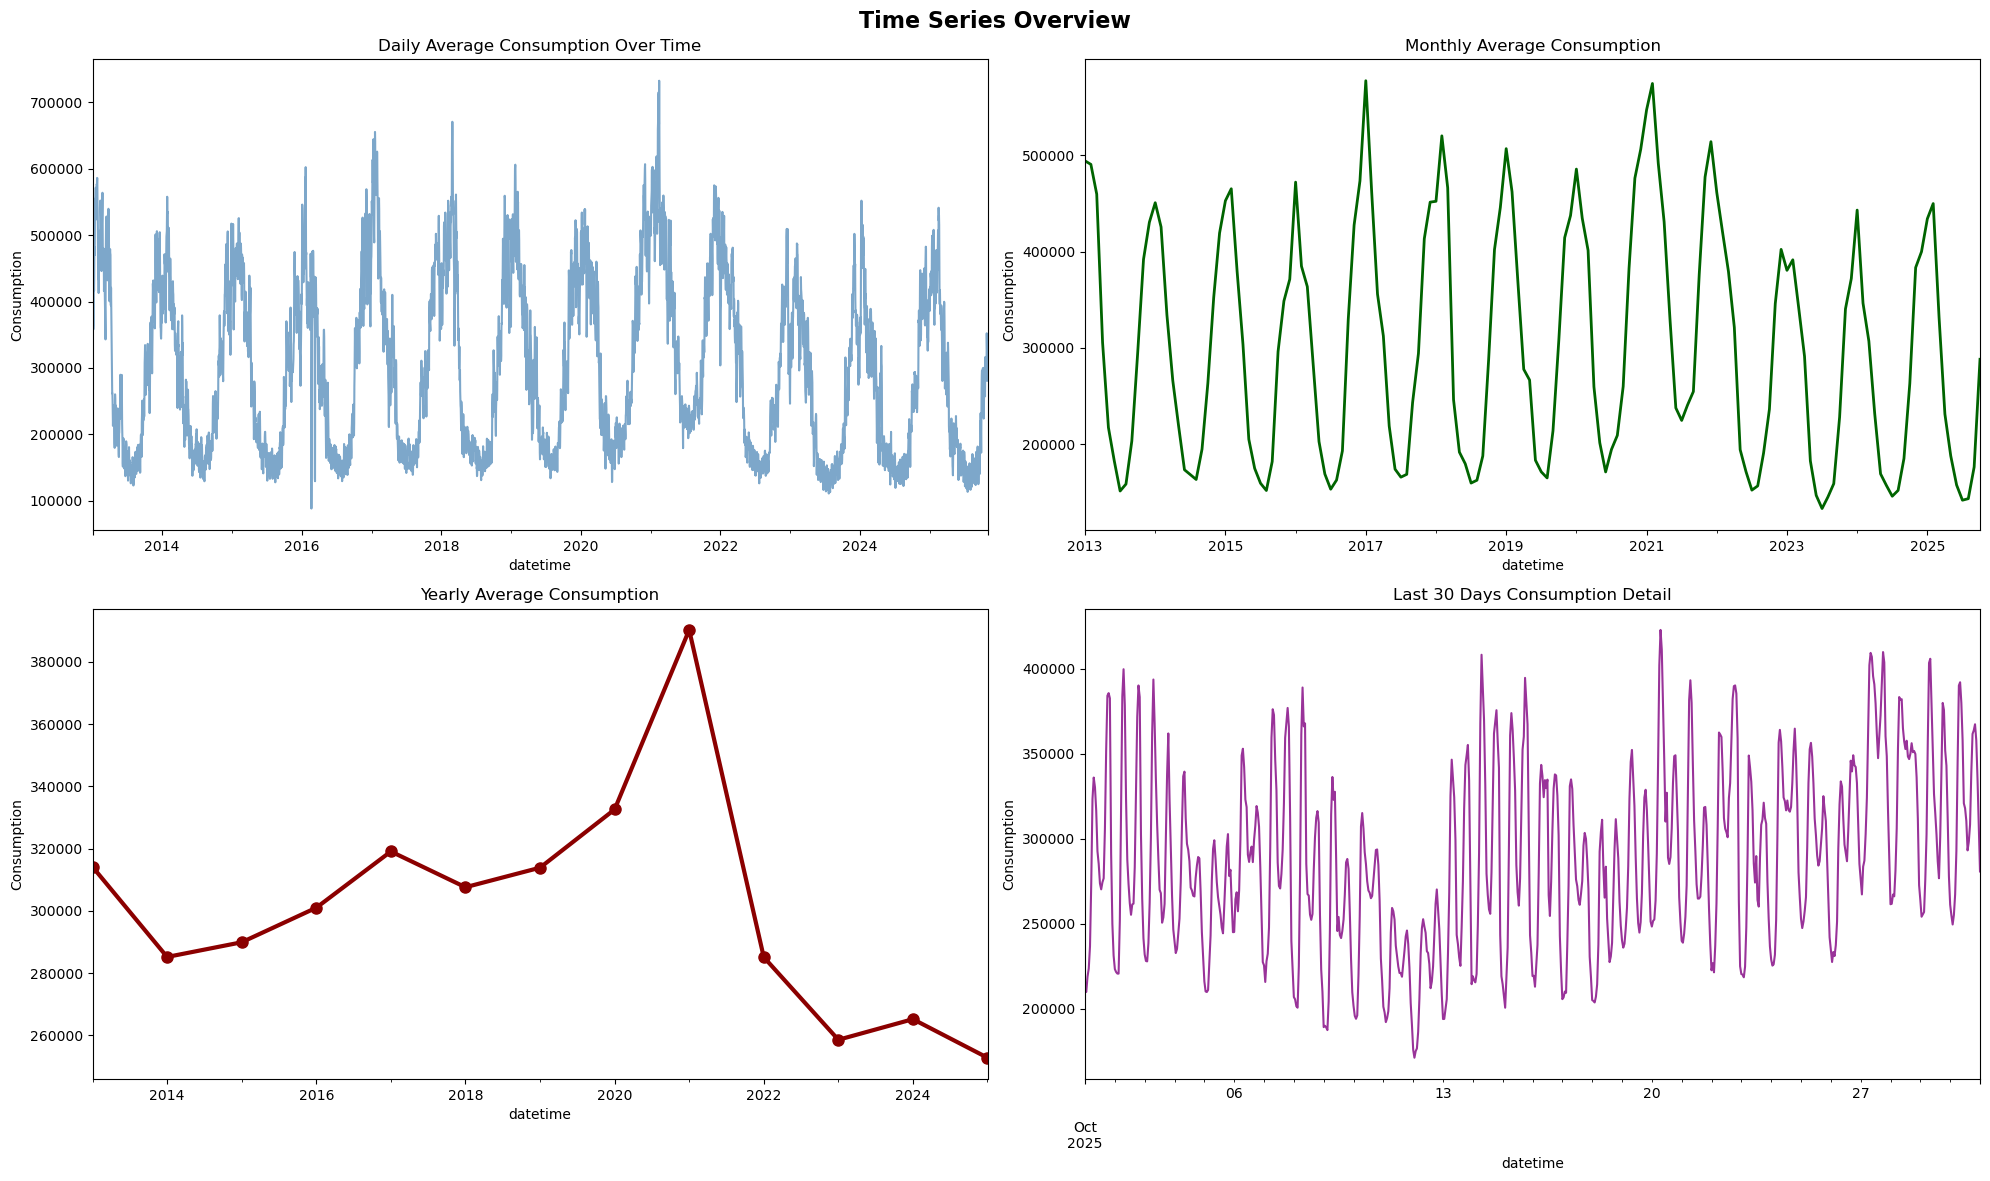

In [9]:
# 1. Time series overview
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Time Series Overview', fontsize=16, fontweight='bold')

# Daily consumption over entire period
df_clean.set_index('datetime')['consumption'].resample('D').mean().plot(ax=axes[0,0], color='steelblue', alpha=0.7)
axes[0,0].set_title('Daily Average Consumption Over Time')
axes[0,0].set_ylabel('Consumption')

# Monthly consumption
monthly_data = df_clean.set_index('datetime')['consumption'].resample('M').mean()
monthly_data.plot(ax=axes[0,1], color='darkgreen', linewidth=2)
axes[0,1].set_title('Monthly Average Consumption')
axes[0,1].set_ylabel('Consumption')

# Yearly consumption
yearly_data = df_clean.set_index('datetime')['consumption'].resample('Y').mean()
yearly_data.plot(ax=axes[1,0], color='darkred', marker='o', linewidth=3, markersize=8)
axes[1,0].set_title('Yearly Average Consumption')
axes[1,0].set_ylabel('Consumption')

# Recent 30 days detail
recent_data = df_clean[df_clean['datetime'] >= df_clean['datetime'].max() - pd.Timedelta(days=30)]
recent_data.set_index('datetime')['consumption'].plot(ax=axes[1,1], color='purple', alpha=0.8)
axes[1,1].set_title('Last 30 Days Consumption Detail')
axes[1,1].set_ylabel('Consumption')

plt.tight_layout()
plt.show()

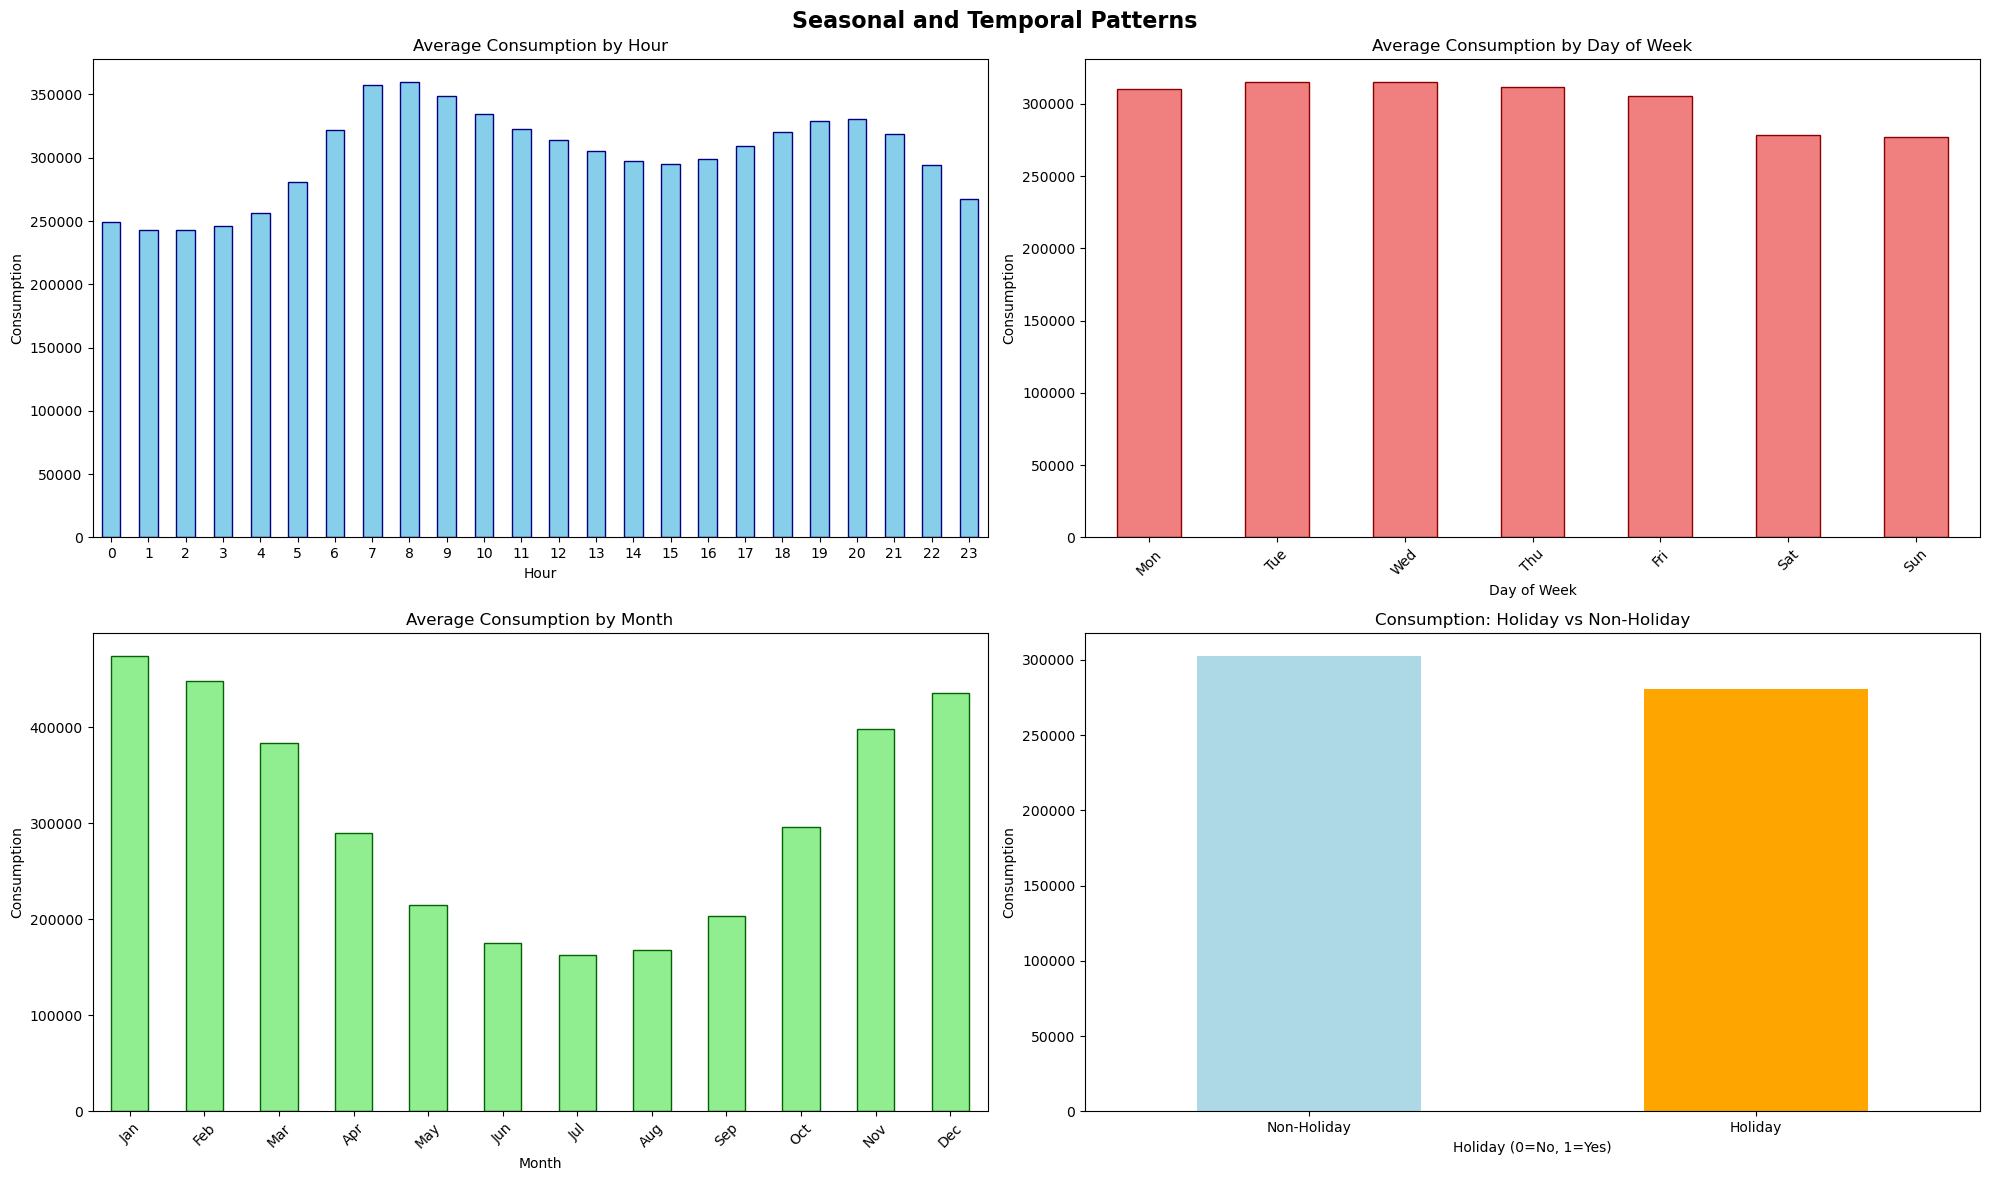

In [10]:
# 2. Seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Seasonal and Temporal Patterns', fontsize=16, fontweight='bold')

# Hourly patterns
hourly_avg = df_clean.groupby('hour')['consumption'].mean()
hourly_avg.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='navy')
axes[0,0].set_title('Average Consumption by Hour')
axes[0,0].set_xlabel('Hour')
axes[0,0].set_ylabel('Consumption')
axes[0,0].tick_params(axis='x', rotation=0)

# Day of week patterns
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = df_clean.groupby('day_of_week')['consumption'].mean()
daily_avg.plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='darkred')
axes[0,1].set_title('Average Consumption by Day of Week')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Consumption')
axes[0,1].set_xticklabels(day_names, rotation=45)

# Monthly patterns
monthly_avg = df_clean.groupby('month')['consumption'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.plot(kind='bar', ax=axes[1,0], color='lightgreen', edgecolor='darkgreen')
axes[1,0].set_title('Average Consumption by Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Consumption')
axes[1,0].set_xticklabels(month_names, rotation=45)

# Holiday vs non-holiday
holiday_comparison = df_clean.groupby('holiday')['consumption'].mean()
colors = ['lightblue', 'orange']
holiday_comparison.plot(kind='bar', ax=axes[1,1], color=colors)
axes[1,1].set_title('Consumption: Holiday vs Non-Holiday')
axes[1,1].set_xlabel('Holiday (0=No, 1=Yes)')
axes[1,1].set_ylabel('Consumption')
axes[1,1].set_xticklabels(['Non-Holiday', 'Holiday'], rotation=0)

plt.tight_layout()
plt.show()

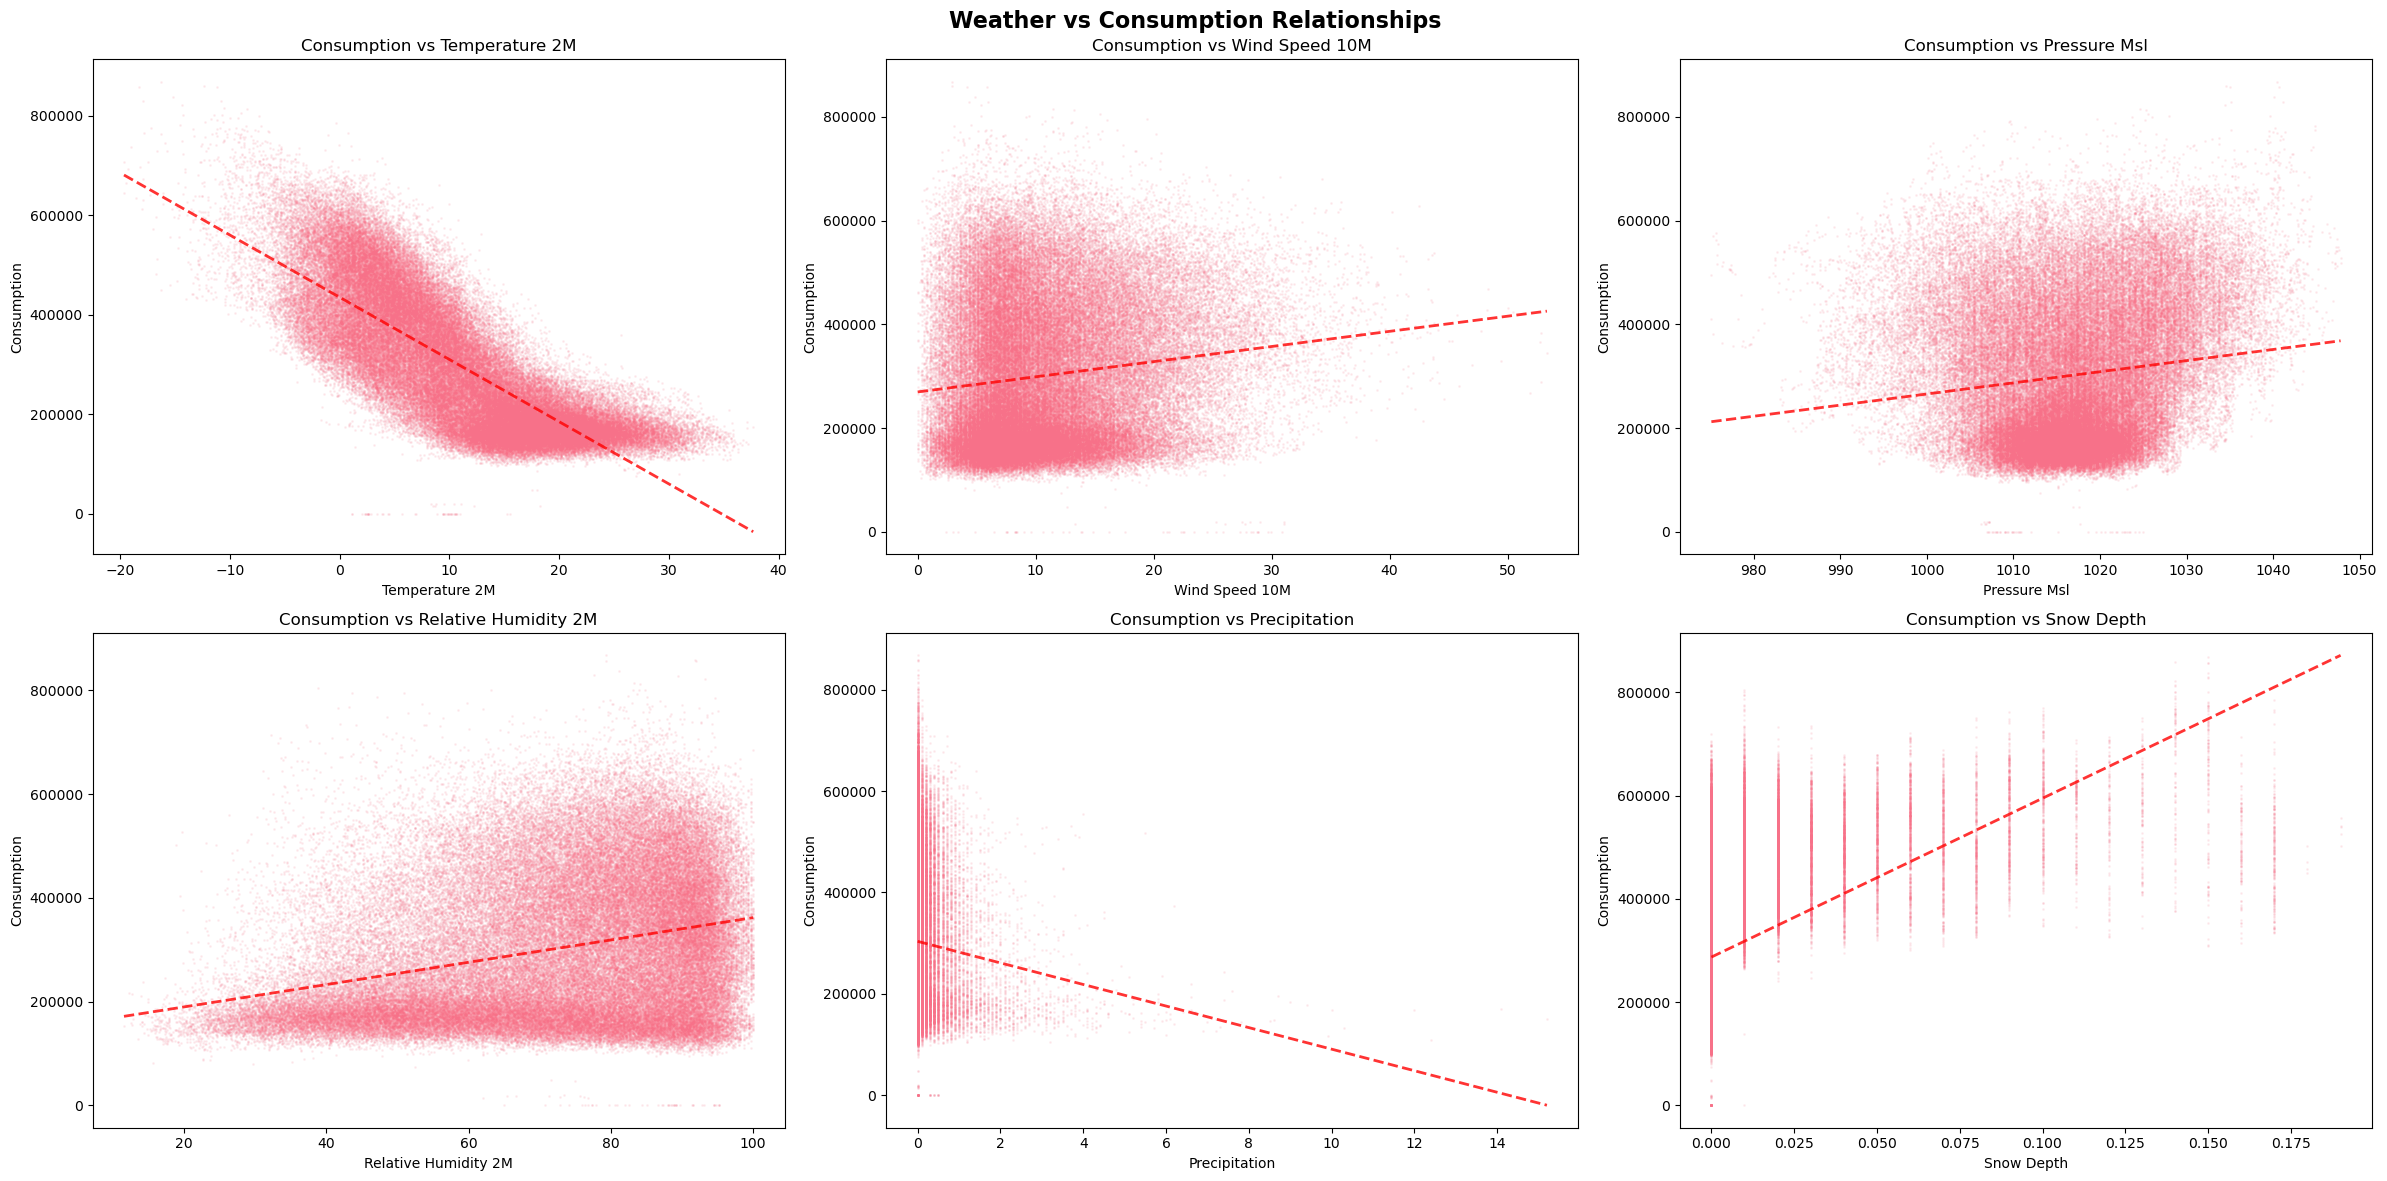

In [11]:
# 3. Weather relationships (Updated with Snow Depth)
weather_cols = ['temperature_2m', 'wind_speed_10m', 'pressure_msl', 'relative_humidity_2m', 'precipitation', 'snow_depth']

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Weather vs Consumption Relationships', fontsize=16, fontweight='bold')

# Scatter plots for key weather variables
for i, col in enumerate(weather_cols):
    row = i // 3
    col_idx = i % 3
    if i < 6:  # Now plot all 6 including snow_depth
        axes[row, col_idx].scatter(df_clean[col], df_clean['consumption'], alpha=0.1, s=1)
        axes[row, col_idx].set_xlabel(col.replace('_', ' ').title())
        axes[row, col_idx].set_ylabel('Consumption')
        axes[row, col_idx].set_title(f'Consumption vs {col.replace("_", " ").title()}')
        
        # Add trend line - with error handling
        try:
            # Get clean data for both variables
            clean_mask = df_clean[col].notna() & df_clean['consumption'].notna()
            x_clean = df_clean.loc[clean_mask, col]
            y_clean = df_clean.loc[clean_mask, 'consumption']
            
            if len(x_clean) > 1 and x_clean.std() > 0:  # Need at least 2 points and some variation
                z = np.polyfit(x_clean, y_clean, 1)
                p = np.poly1d(z)
                x_range = np.linspace(x_clean.min(), x_clean.max(), 100)
                axes[row, col_idx].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
        except (np.linalg.LinAlgError, ValueError):
            # Skip trend line if fitting fails
            pass

plt.tight_layout()
plt.show()

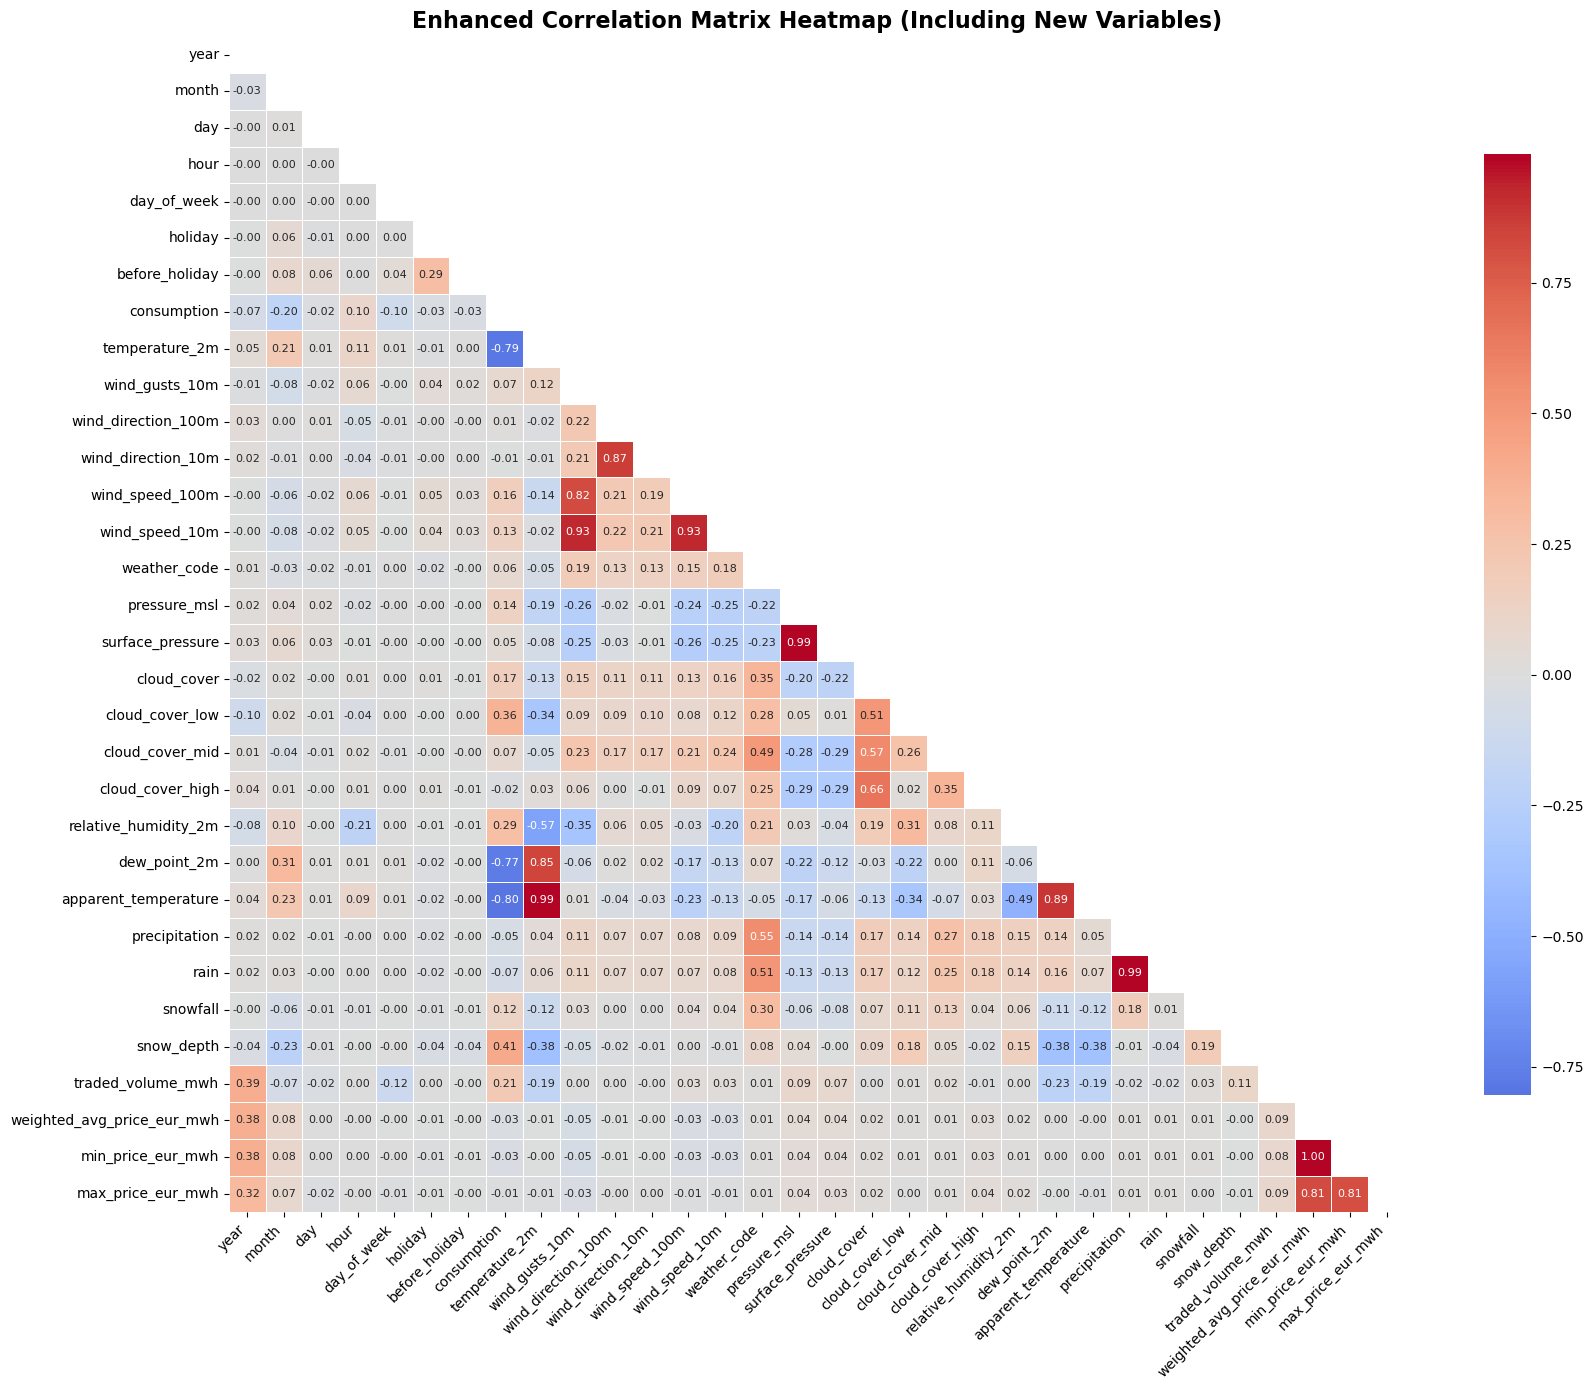

Top correlations with consumption (including new variables):
apparent_temperature    0.803598
temperature_2m          0.788570
dew_point_2m            0.772876
snow_depth              0.413498
cloud_cover_low         0.358902
relative_humidity_2m    0.285425
traded_volume_mwh       0.210157
month                   0.197507
cloud_cover             0.168487
wind_speed_100m         0.159735
pressure_msl            0.136571
wind_speed_10m          0.133303
snowfall                0.124264
hour                    0.099158
day_of_week             0.095603
Name: consumption, dtype: float64

Correlations of new variables with consumption:
snow_depth: 0.413
traded_volume_mwh: 0.210
weighted_avg_price_eur_mwh: -0.028
min_price_eur_mwh: -0.032
max_price_eur_mwh: -0.011


In [12]:
# 4. Enhanced Correlation heatmap (Updated with New Variables)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'datetime' in numeric_cols:
    numeric_cols.remove('datetime')

corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f',
            annot_kws={'size': 8})
plt.title('Enhanced Correlation Matrix Heatmap (Including New Variables)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top correlations with consumption (updated)
consumption_corr = corr_matrix['consumption'].drop('consumption').abs().sort_values(ascending=False)
print("Top correlations with consumption (including new variables):")
print(consumption_corr.head(15))

# New variables correlations
new_vars = ['snow_depth', 'traded_volume_mwh', 'weighted_avg_price_eur_mwh', 
            'min_price_eur_mwh', 'max_price_eur_mwh']
available_new_vars = [var for var in new_vars if var in df_clean.columns]
if available_new_vars:
    print(f"\nCorrelations of new variables with consumption:")
    for var in available_new_vars:
        if var in consumption_corr.index:
            print(f"{var}: {corr_matrix.loc['consumption', var]:.3f}")

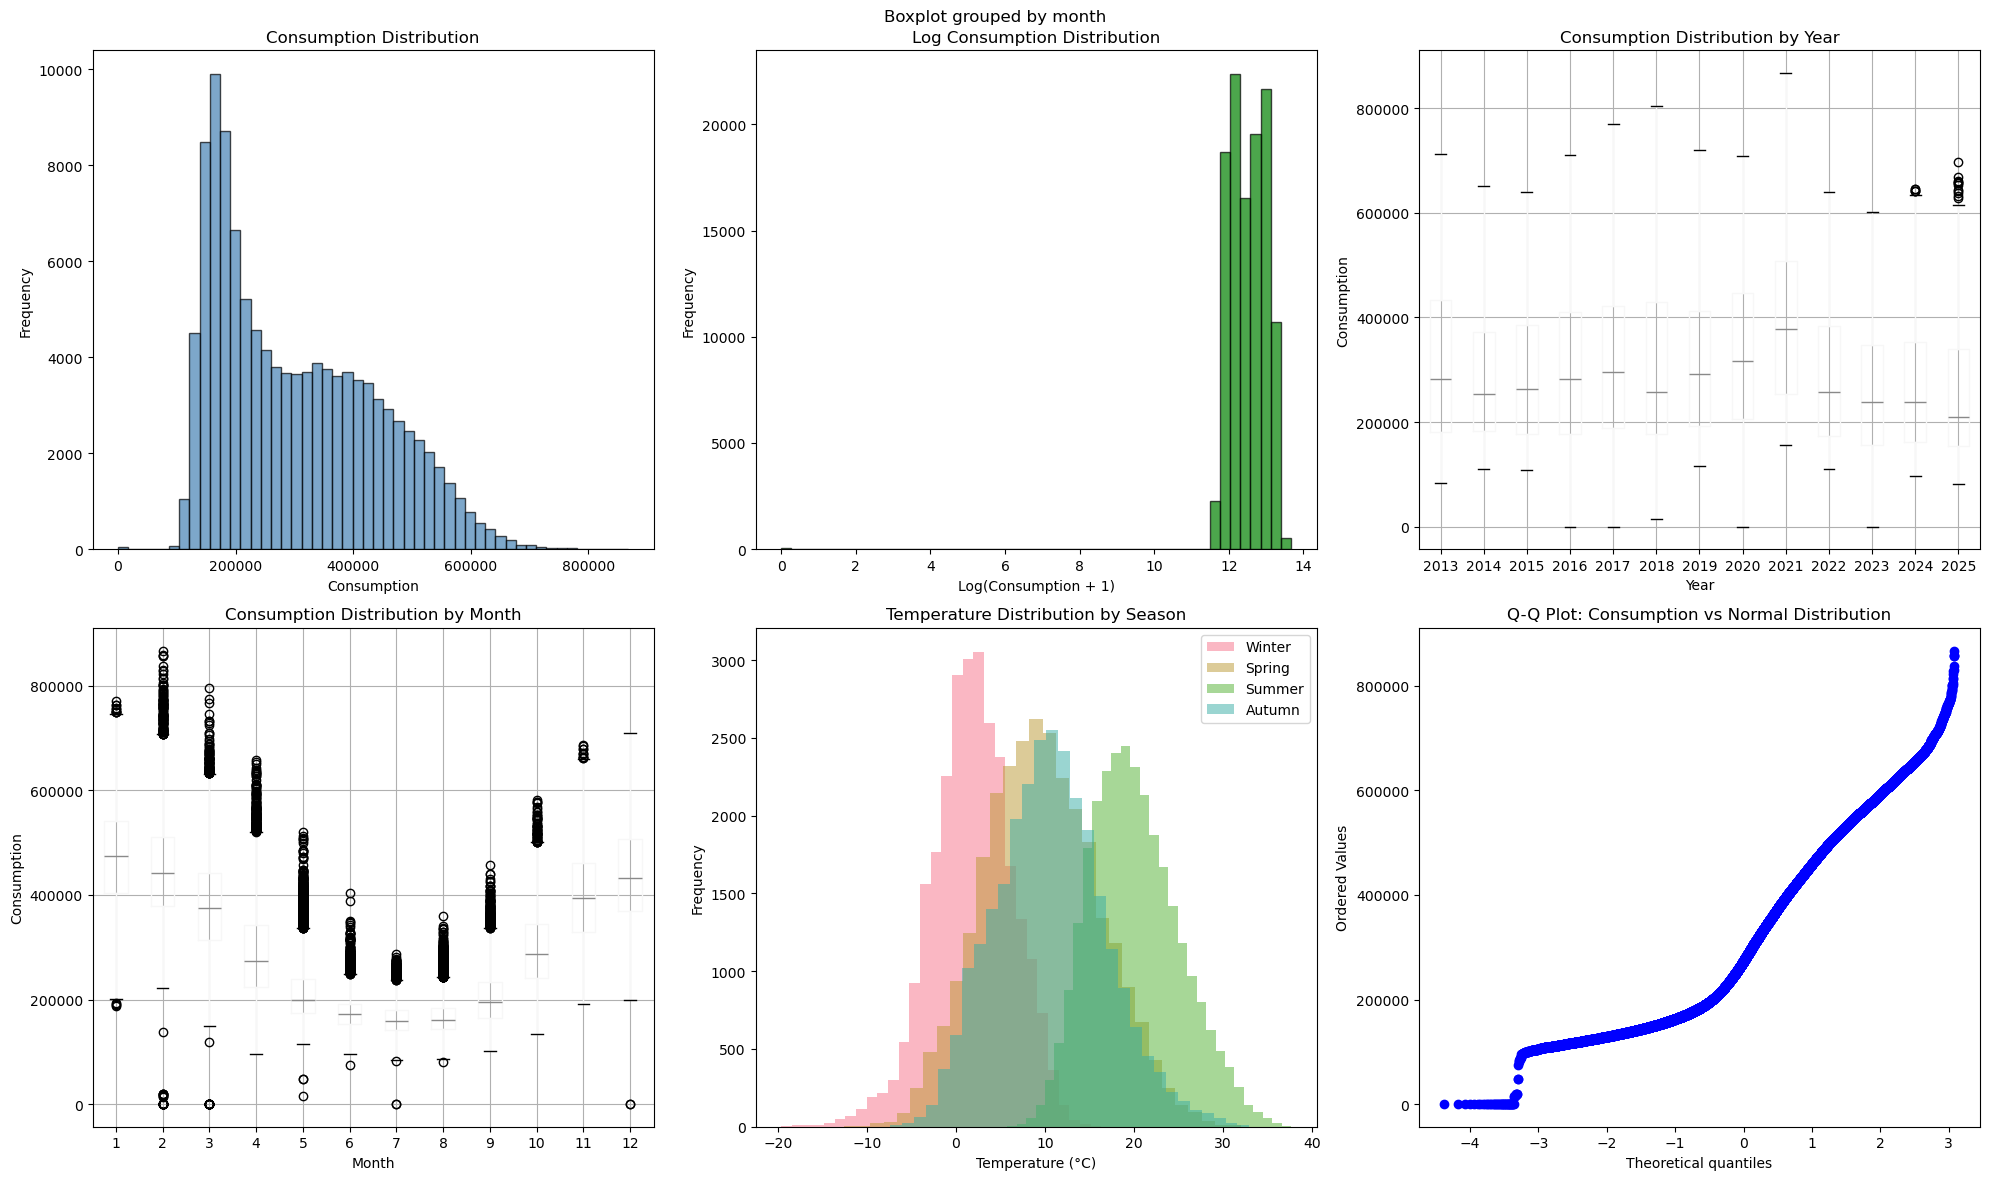

In [13]:
# 5. Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution Analysis', fontsize=16, fontweight='bold')

# Consumption distribution
axes[0, 0].hist(df_clean['consumption'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Consumption Distribution')
axes[0, 0].set_xlabel('Consumption')
axes[0, 0].set_ylabel('Frequency')

# Log consumption distribution
axes[0, 1].hist(np.log1p(df_clean['consumption']), bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Log Consumption Distribution')
axes[0, 1].set_xlabel('Log(Consumption + 1)')
axes[0, 1].set_ylabel('Frequency')

# Box plot by year
df_clean.boxplot(column='consumption', by='year', ax=axes[0, 2])
axes[0, 2].set_title('Consumption Distribution by Year')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Consumption')

# Box plot by month
df_clean.boxplot(column='consumption', by='month', ax=axes[1, 0])
axes[1, 0].set_title('Consumption Distribution by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Consumption')

# Temperature distribution by season
df_clean['season'] = df_clean['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                           3: 'Spring', 4: 'Spring', 5: 'Spring',
                                           6: 'Summer', 7: 'Summer', 8: 'Summer',
                                           9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    season_data = df_clean[df_clean['season'] == season]['temperature_2m']
    axes[1, 1].hist(season_data, alpha=0.5, label=season, bins=30)
axes[1, 1].set_title('Temperature Distribution by Season')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# QQ plot for consumption
from scipy import stats
stats.probplot(df_clean['consumption'], dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot: Consumption vs Normal Distribution')

plt.tight_layout()
plt.show()

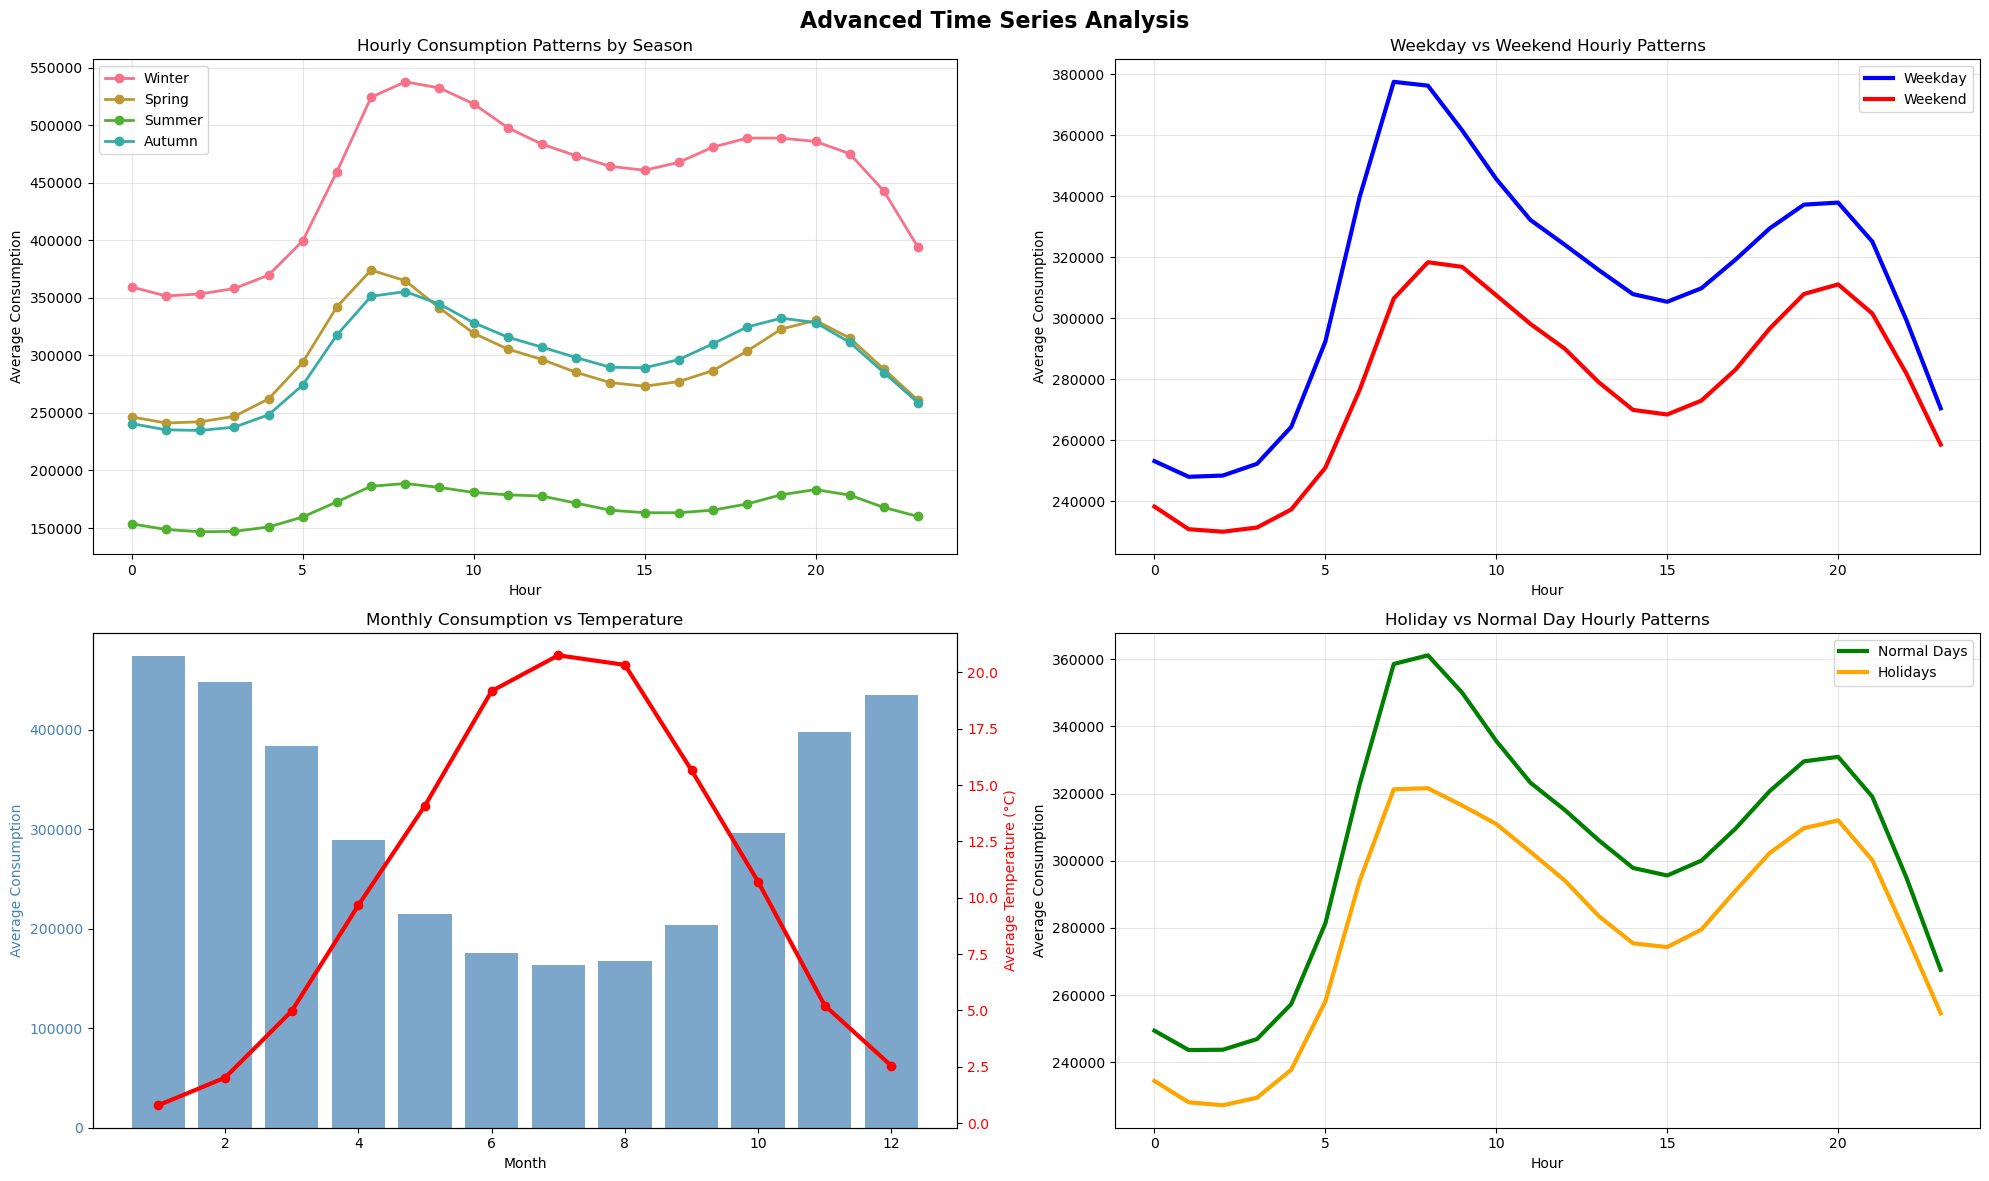

In [14]:
# 6. Advanced time series patterns
# Add season column
df_clean['season'] = df_clean['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                           3: 'Spring', 4: 'Spring', 5: 'Spring',
                                           6: 'Summer', 7: 'Summer', 8: 'Summer',
                                           9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Advanced Time Series Analysis', fontsize=16, fontweight='bold')

# Hourly patterns by season
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    season_hourly = df_clean[df_clean['season'] == season].groupby('hour')['consumption'].mean()
    axes[0, 0].plot(season_hourly.index, season_hourly.values, label=season, linewidth=2, marker='o')
axes[0, 0].set_title('Hourly Consumption Patterns by Season')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Average Consumption')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Weekday vs Weekend patterns
weekday_hourly = df_clean[df_clean['day_of_week'] < 5].groupby('hour')['consumption'].mean()
weekend_hourly = df_clean[df_clean['day_of_week'] >= 5].groupby('hour')['consumption'].mean()
axes[0, 1].plot(weekday_hourly.index, weekday_hourly.values, label='Weekday', linewidth=3, color='blue')
axes[0, 1].plot(weekend_hourly.index, weekend_hourly.values, label='Weekend', linewidth=3, color='red')
axes[0, 1].set_title('Weekday vs Weekend Hourly Patterns')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Average Consumption')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Monthly temperature vs consumption
monthly_temp = df_clean.groupby('month')['temperature_2m'].mean()
monthly_cons = df_clean.groupby('month')['consumption'].mean()
ax2 = axes[1, 0].twinx()
bars1 = axes[1, 0].bar(monthly_temp.index, monthly_cons.values, alpha=0.7, color='steelblue', label='Consumption')
line2 = ax2.plot(monthly_temp.index, monthly_temp.values, color='red', marker='o', linewidth=3, label='Temperature')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Consumption', color='steelblue')
ax2.set_ylabel('Average Temperature (°C)', color='red')
axes[1, 0].set_title('Monthly Consumption vs Temperature')
axes[1, 0].tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='red')

# Holiday effect analysis
holiday_hourly = df_clean[df_clean['holiday'] == 1].groupby('hour')['consumption'].mean()
normal_hourly = df_clean[df_clean['holiday'] == 0].groupby('hour')['consumption'].mean()
axes[1, 1].plot(normal_hourly.index, normal_hourly.values, label='Normal Days', linewidth=3, color='green')
axes[1, 1].plot(holiday_hourly.index, holiday_hourly.values, label='Holidays', linewidth=3, color='orange')
axes[1, 1].set_title('Holiday vs Normal Day Hourly Patterns')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Average Consumption')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

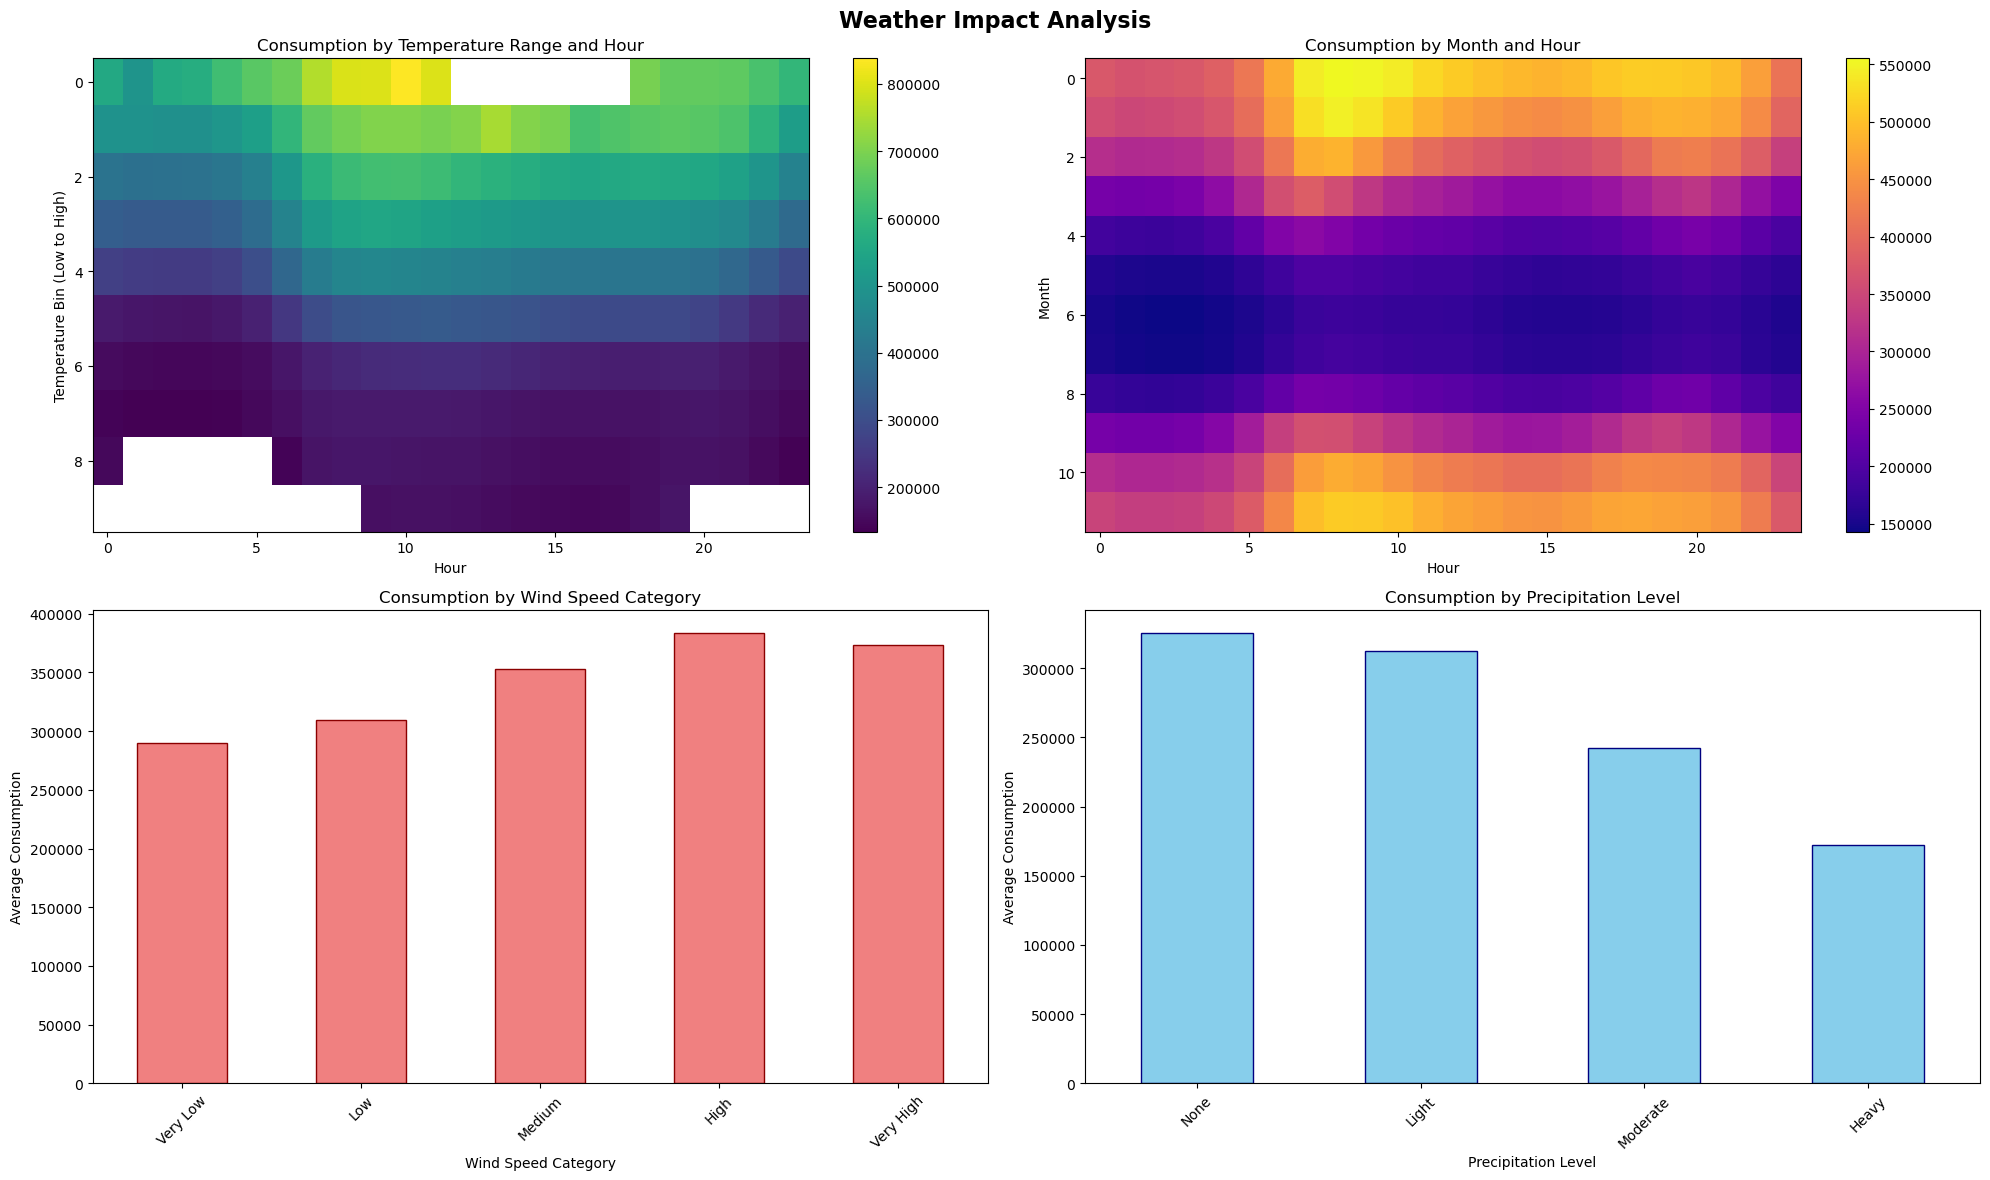

In [15]:
# 7. Weather impact heatmaps
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Weather Impact Analysis', fontsize=16, fontweight='bold')

# Temperature bins vs hour heatmap
df_clean['temp_bin'] = pd.cut(df_clean['temperature_2m'], bins=10, labels=False)
temp_hour_pivot = df_clean.pivot_table(values='consumption', index='temp_bin', columns='hour', aggfunc='mean')
im1 = axes[0, 0].imshow(temp_hour_pivot.values, aspect='auto', cmap='viridis')
axes[0, 0].set_title('Consumption by Temperature Range and Hour')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Temperature Bin (Low to High)')
plt.colorbar(im1, ax=axes[0, 0])

# Month vs hour heatmap
month_hour_pivot = df_clean.pivot_table(values='consumption', index='month', columns='hour', aggfunc='mean')
im2 = axes[0, 1].imshow(month_hour_pivot.values, aspect='auto', cmap='plasma')
axes[0, 1].set_title('Consumption by Month and Hour')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Month')
plt.colorbar(im2, ax=axes[0, 1])

# Wind speed impact
df_clean['wind_bin'] = pd.cut(df_clean['wind_speed_10m'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
wind_consumption = df_clean.groupby('wind_bin')['consumption'].mean()
wind_consumption.plot(kind='bar', ax=axes[1, 0], color='lightcoral', edgecolor='darkred')
axes[1, 0].set_title('Consumption by Wind Speed Category')
axes[1, 0].set_xlabel('Wind Speed Category')
axes[1, 0].set_ylabel('Average Consumption')
axes[1, 0].tick_params(axis='x', rotation=45)

# Precipitation impact
df_clean['precip_bin'] = pd.cut(df_clean['precipitation'], bins=[0, 0.1, 1, 5, 50], labels=['None', 'Light', 'Moderate', 'Heavy'])
precip_consumption = df_clean.groupby('precip_bin')['consumption'].mean()
precip_consumption.plot(kind='bar', ax=axes[1, 1], color='skyblue', edgecolor='navy')
axes[1, 1].set_title('Consumption by Precipitation Level')
axes[1, 1].set_xlabel('Precipitation Level')
axes[1, 1].set_ylabel('Average Consumption')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

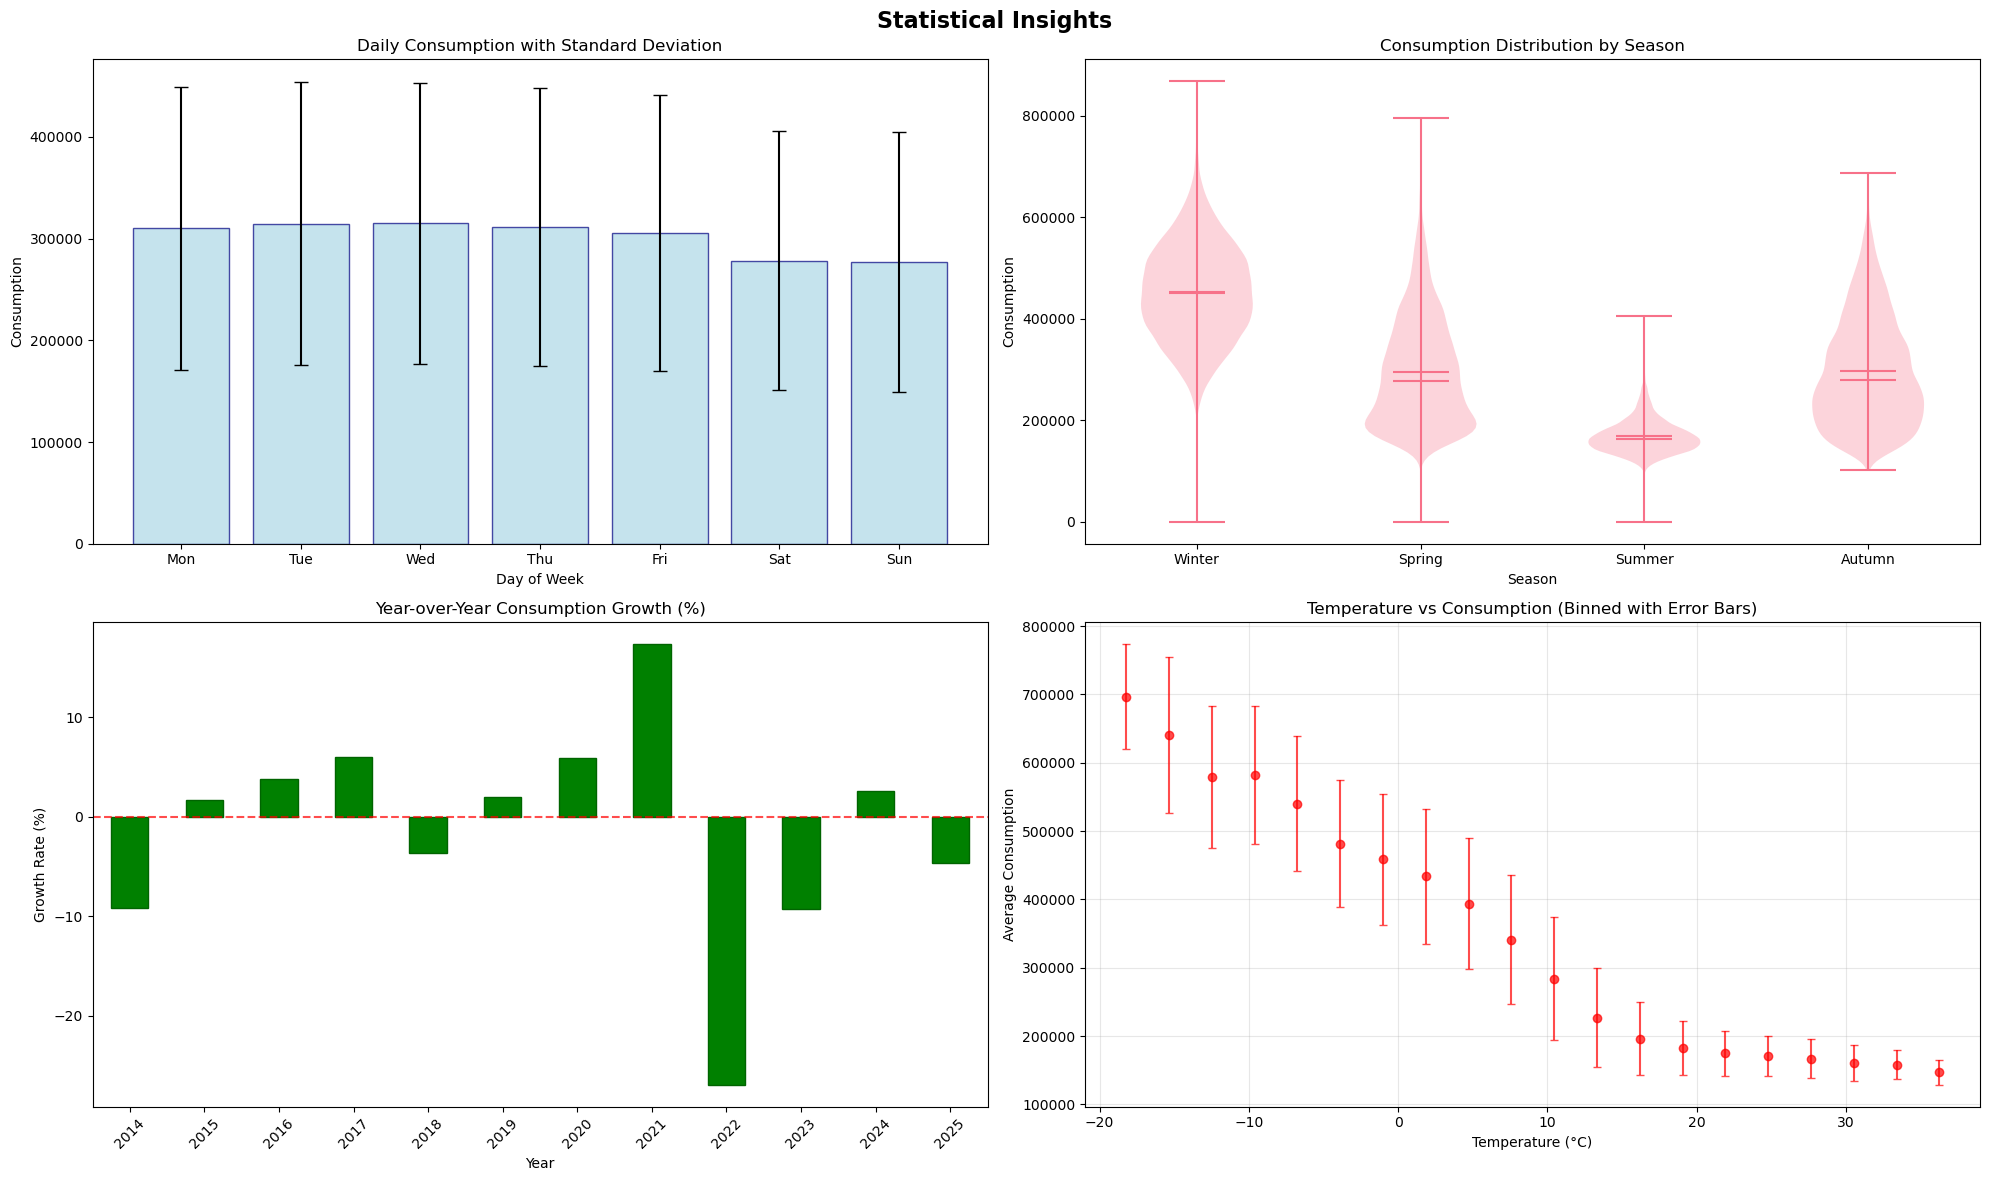

In [16]:
# 8. Statistical insights
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Statistical Insights', fontsize=16, fontweight='bold')

# Always recalculate season column to ensure correctness
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
df_clean['season'] = df_clean['month'].map(season_map)

# Consumption by day of week with error bars
daily_stats = df_clean.groupby('day_of_week')['consumption'].agg(['mean', 'std'])
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x_pos = range(len(day_names))
axes[0, 0].bar(x_pos, daily_stats['mean'], yerr=daily_stats['std'], 
               capsize=5, color='lightblue', edgecolor='navy', alpha=0.7)
axes[0, 0].set_title('Daily Consumption with Standard Deviation')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Consumption')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(day_names)

# Seasonal consumption violin plot
seasonal_order = ['Winter', 'Spring', 'Summer', 'Autumn']
data_to_plot = []
for season in seasonal_order:
    vals = df_clean.loc[df_clean['season'] == season, 'consumption'].dropna()
    # Only plot if there are at least 2 data points (violinplot needs >1)
    if len(vals) > 1:
        data_to_plot.append(vals.values)
    else:
        data_to_plot.append([np.nan, np.nan])  # Dummy values to keep positions correct
axes[0, 1].violinplot(data_to_plot, positions=range(len(seasonal_order)), showmeans=True, showmedians=True)
axes[0, 1].set_title('Consumption Distribution by Season')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Consumption')
axes[0, 1].set_xticks(range(len(seasonal_order)))
axes[0, 1].set_xticklabels(seasonal_order)
axes[0, 1].set_xlim(-0.5, len(seasonal_order)-0.5)

# Year-over-year growth
yearly_avg = df_clean.groupby('year')['consumption'].mean()
if len(yearly_avg) > 1:
    yearly_growth = yearly_avg.pct_change() * 100
    yearly_growth.dropna().plot(kind='bar', ax=axes[1, 0], color='green', edgecolor='darkgreen')
    axes[1, 0].set_title('Year-over-Year Consumption Growth (%)')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Growth Rate (%)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Temperature vs consumption regression with confidence intervals
temperature_clean = df_clean['temperature_2m'].dropna()
consumption_clean = df_clean.loc[temperature_clean.index, 'consumption']
# Create temperature bins for cleaner visualization
temp_bins = pd.cut(temperature_clean, bins=20)
binned_data = df_clean.loc[temperature_clean.index].groupby(temp_bins)['consumption'].agg(['mean', 'std', 'count'])
binned_data = binned_data[binned_data['count'] >= 10]  # Only bins with sufficient data
x_centers = [interval.mid for interval in binned_data.index]
axes[1, 1].errorbar(x_centers, binned_data['mean'], yerr=binned_data['std'], 
                   fmt='o', capsize=3, alpha=0.7, color='red')
axes[1, 1].set_title('Temperature vs Consumption (Binned with Error Bars)')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Average Consumption')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Statistics

In [17]:
# Enhanced summary statistics (Updated with New Variables)
print("=== DATASET SUMMARY ===")
print(f"Total records: {len(df_clean):,}")
print(f"Date range: {df_clean['datetime'].min()} to {df_clean['datetime'].max()}")
print(f"Years covered: {df_clean['year'].nunique()}")
print(f"Outliers removed: {len(df) - len(df_clean):,}")

print("\n=== CONSUMPTION PATTERNS ===")
print(f"Average consumption: {df_clean['consumption'].mean():.2f}")
print(f"Peak consumption: {df_clean['consumption'].max():.2f}")
print(f"Minimum consumption: {df_clean['consumption'].min():.2f}")

peak_hour = df_clean.groupby('hour')['consumption'].mean().idxmax()
min_hour = df_clean.groupby('hour')['consumption'].mean().idxmin()
print(f"Peak hour: {peak_hour}:00")
print(f"Minimum hour: {min_hour}:00")

weekday_avg = df_clean[df_clean['day_of_week'] < 5]['consumption'].mean()
weekend_avg = df_clean[df_clean['day_of_week'] >= 5]['consumption'].mean()
print(f"Weekday avg: {weekday_avg:.2f}")
print(f"Weekend avg: {weekend_avg:.2f}")

print("\n=== WEATHER CORRELATIONS (INCLUDING SNOW DEPTH) ===")
weather_vars = ['temperature_2m', 'wind_speed_10m', 'pressure_msl', 'relative_humidity_2m', 'snow_depth']
available_weather = [var for var in weather_vars if var in df_clean.columns]
weather_correlations = df_clean[['consumption'] + available_weather].corr()['consumption'].drop('consumption')
for var, corr in weather_correlations.items():
    print(f"{var}: {corr:.3f}")

print("\n=== ENERGY MARKET STATISTICS ===")
market_vars = ['traded_volume_mwh', 'weighted_avg_price_eur_mwh', 'min_price_eur_mwh', 'max_price_eur_mwh']
available_market = [var for var in market_vars if var in df_clean.columns]

for var in available_market:
    if var in df_clean.columns:
        print(f"{var.replace('_', ' ').title()}:")
        print(f"  Mean: {df_clean[var].mean():.2f}")
        print(f"  Min: {df_clean[var].min():.2f}")
        print(f"  Max: {df_clean[var].max():.2f}")
        print(f"  Std: {df_clean[var].std():.2f}")

if 'price_spread' in df_clean.columns:
    print(f"Price Spread (Max-Min):")
    print(f"  Mean: {df_clean['price_spread'].mean():.2f}")
    print(f"  Max: {df_clean['price_spread'].max():.2f}")

print("\n=== ENERGY MARKET CORRELATIONS ===")
if available_market:
    market_correlations = df_clean[['consumption'] + available_market].corr()['consumption'].drop('consumption')
    for var, corr in market_correlations.items():
        print(f"{var}: {corr:.3f}")

print(f"\n=== DATA QUALITY ===")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Data completeness: {(1 - df_clean.isnull().sum().sum() / (len(df_clean) * len(df_clean.columns))) * 100:.2f}%")

# Missing values for new variables
new_vars = ['snow_depth', 'traded_volume_mwh', 'weighted_avg_price_eur_mwh', 'min_price_eur_mwh', 'max_price_eur_mwh']
available_new = [var for var in new_vars if var in df_clean.columns]
if available_new:
    print(f"\nMissing values in new variables:")
    for var in available_new:
        missing_count = df_clean[var].isnull().sum()
        missing_pct = (missing_count / len(df_clean)) * 100
        print(f"  {var}: {missing_count} ({missing_pct:.2f}%)")

=== DATASET SUMMARY ===
Total records: 112,453
Date range: 2013-01-01 00:00:00 to 2025-10-31 00:00:00
Years covered: 13
Outliers removed: 12

=== CONSUMPTION PATTERNS ===
Average consumption: 301786.38
Peak consumption: 867767.00
Minimum consumption: 0.00
Peak hour: 8:00
Minimum hour: 1:00
Weekday avg: 311434.64
Weekend avg: 277674.30

=== WEATHER CORRELATIONS (INCLUDING SNOW DEPTH) ===
temperature_2m: -0.789
wind_speed_10m: 0.133
pressure_msl: 0.137
relative_humidity_2m: 0.285
snow_depth: 0.413

=== ENERGY MARKET STATISTICS ===
Traded Volume Mwh:
  Mean: 8779.32
  Min: 0.00
  Max: 82021.80
  Std: 8056.19
Weighted Avg Price Eur Mwh:
  Mean: 33.69
  Min: 3.70
  Max: 307.99
  Std: 33.94
Min Price Eur Mwh:
  Mean: 32.34
  Min: 3.01
  Max: 271.40
  Std: 31.69
Max Price Eur Mwh:
  Mean: 35.77
  Min: 4.63
  Max: 1500.00
  Std: 44.79

=== ENERGY MARKET CORRELATIONS ===
traded_volume_mwh: 0.210
weighted_avg_price_eur_mwh: -0.028
min_price_eur_mwh: -0.032
max_price_eur_mwh: -0.011

=== DATA QUA

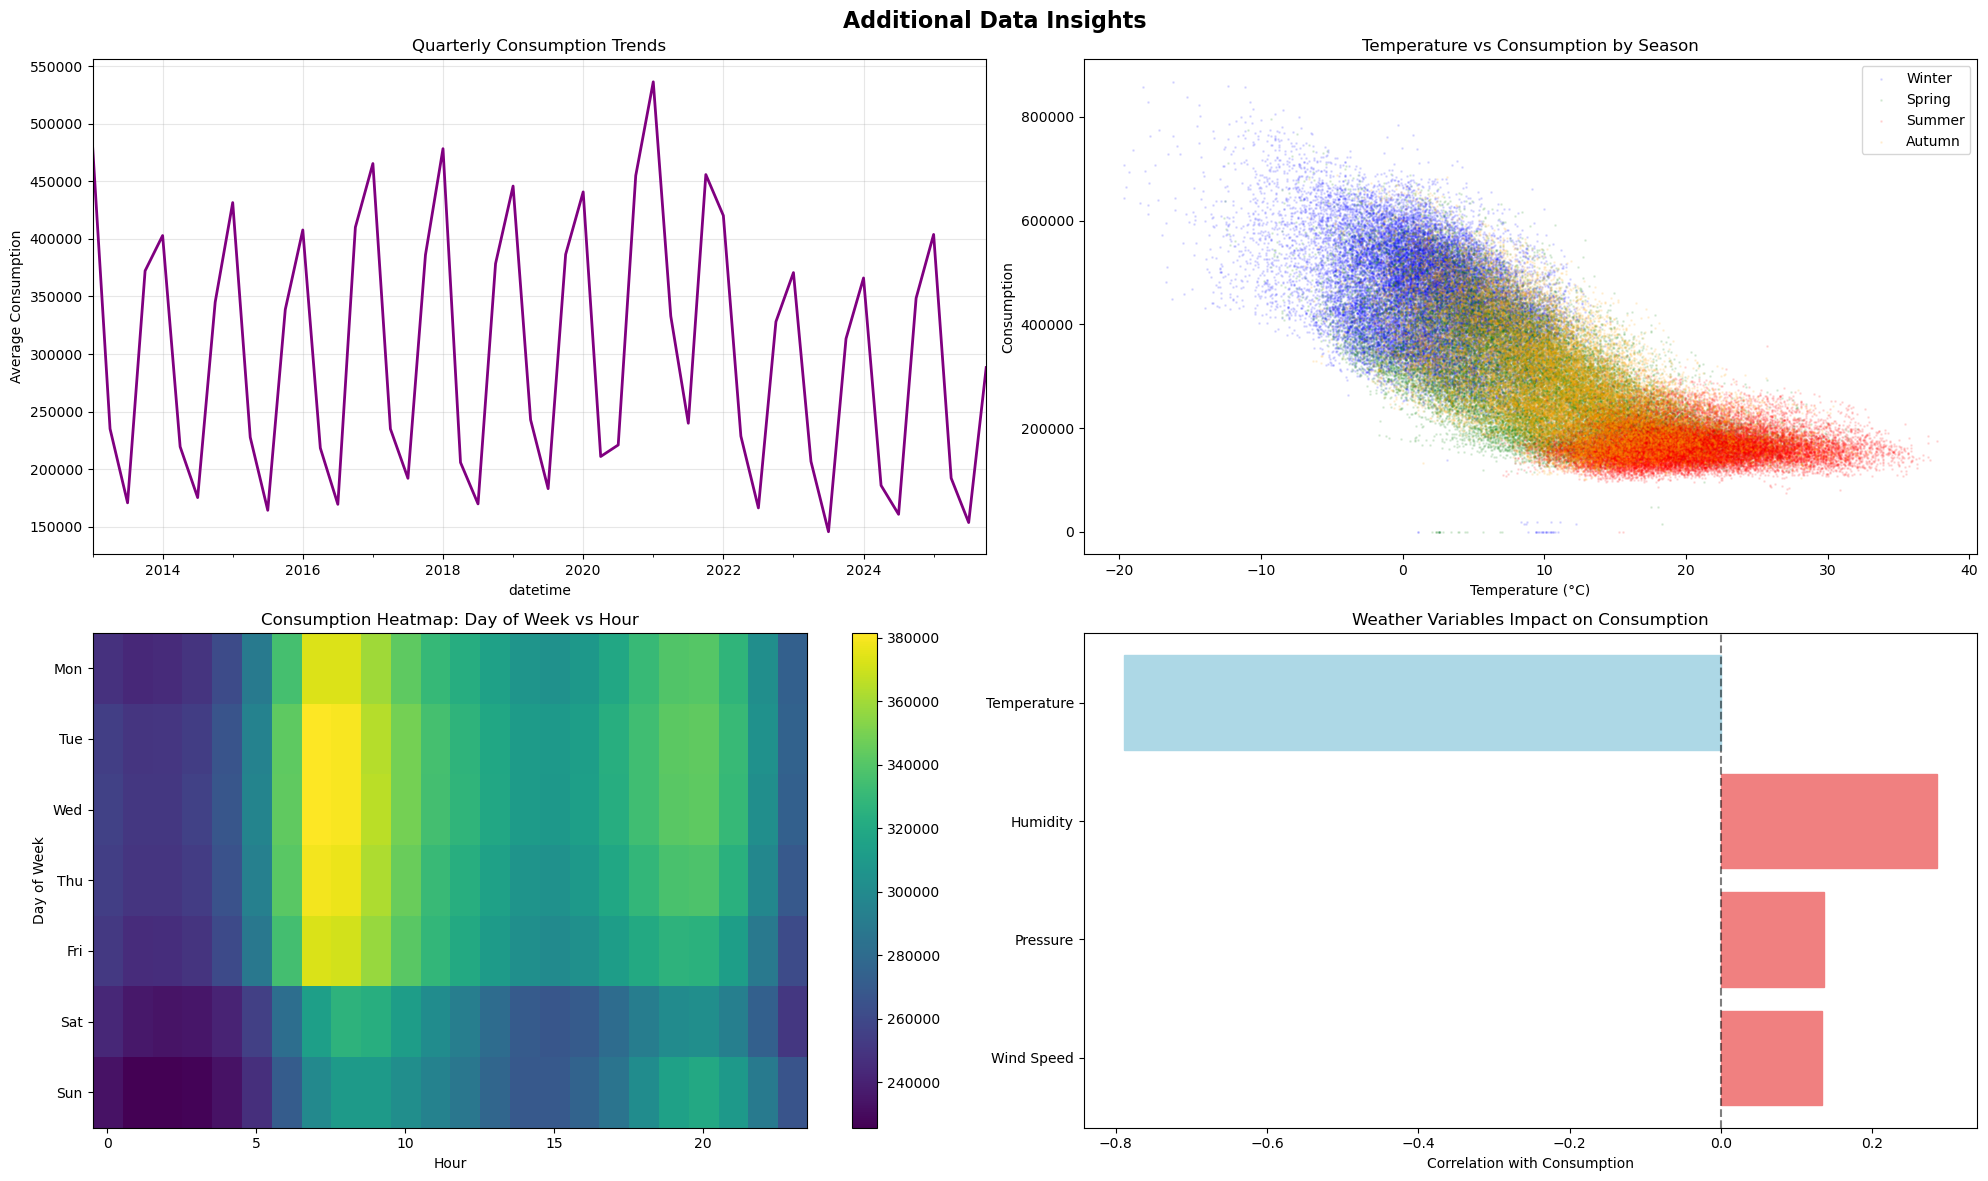

EDA Complete! Key findings:
- Strong negative correlation between temperature and consumption (-0.795)
- Clear seasonal patterns with winter having highest consumption
- Peak consumption around 8 AM, minimum around 1 AM
- Weekend consumption lower than weekday consumption
- Holiday effect shows reduced consumption patterns


In [18]:
# 9. Additional insights
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Additional Data Insights', fontsize=16, fontweight='bold')

# Consumption trends over time
df_clean.set_index('datetime')['consumption'].resample('Q').mean().plot(ax=axes[0,0], color='purple', linewidth=2)
axes[0,0].set_title('Quarterly Consumption Trends')
axes[0,0].set_ylabel('Average Consumption')
axes[0,0].grid(True, alpha=0.3)

# Temperature vs consumption by season scatter
colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Autumn': 'orange'}
for season in colors.keys():
    season_data = df_clean[df_clean['season'] == season]
    axes[0,1].scatter(season_data['temperature_2m'], season_data['consumption'], 
                     c=colors[season], alpha=0.1, s=1, label=season)
axes[0,1].set_xlabel('Temperature (°C)')
axes[0,1].set_ylabel('Consumption')
axes[0,1].set_title('Temperature vs Consumption by Season')
axes[0,1].legend()

# Hourly consumption heatmap by day of week
hourly_dow = df_clean.pivot_table(values='consumption', index='day_of_week', columns='hour', aggfunc='mean')
im = axes[1,0].imshow(hourly_dow.values, cmap='viridis', aspect='auto')
axes[1,0].set_title('Consumption Heatmap: Day of Week vs Hour')
axes[1,0].set_xlabel('Hour')
axes[1,0].set_ylabel('Day of Week')
axes[1,0].set_yticks(range(7))
axes[1,0].set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.colorbar(im, ax=axes[1,0])

# Weather impact summary - only use available variables
available_weather = ['temperature_2m', 'wind_speed_10m', 'pressure_msl', 'relative_humidity_2m']
weather_labels = ['Temperature', 'Wind Speed', 'Pressure', 'Humidity']

weather_impact = pd.DataFrame({
    'Weather Variable': weather_labels,
    'Correlation': [weather_correlations[var] for var in available_weather]
})
weather_impact['Abs_Correlation'] = abs(weather_impact['Correlation'])
weather_impact = weather_impact.sort_values('Abs_Correlation', ascending=True)

bars = axes[1,1].barh(weather_impact['Weather Variable'], weather_impact['Correlation'])
axes[1,1].set_title('Weather Variables Impact on Consumption')
axes[1,1].set_xlabel('Correlation with Consumption')
axes[1,1].axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Color bars based on positive/negative correlation
for i, bar in enumerate(bars):
    if weather_impact.iloc[i]['Correlation'] >= 0:
        bar.set_color('lightcoral')
    else:
        bar.set_color('lightblue')

plt.tight_layout()
plt.show()

print("EDA Complete! Key findings:")
print("- Strong negative correlation between temperature and consumption (-0.795)")
print("- Clear seasonal patterns with winter having highest consumption")
print("- Peak consumption around 8 AM, minimum around 1 AM")
print("- Weekend consumption lower than weekday consumption")
print("- Holiday effect shows reduced consumption patterns")

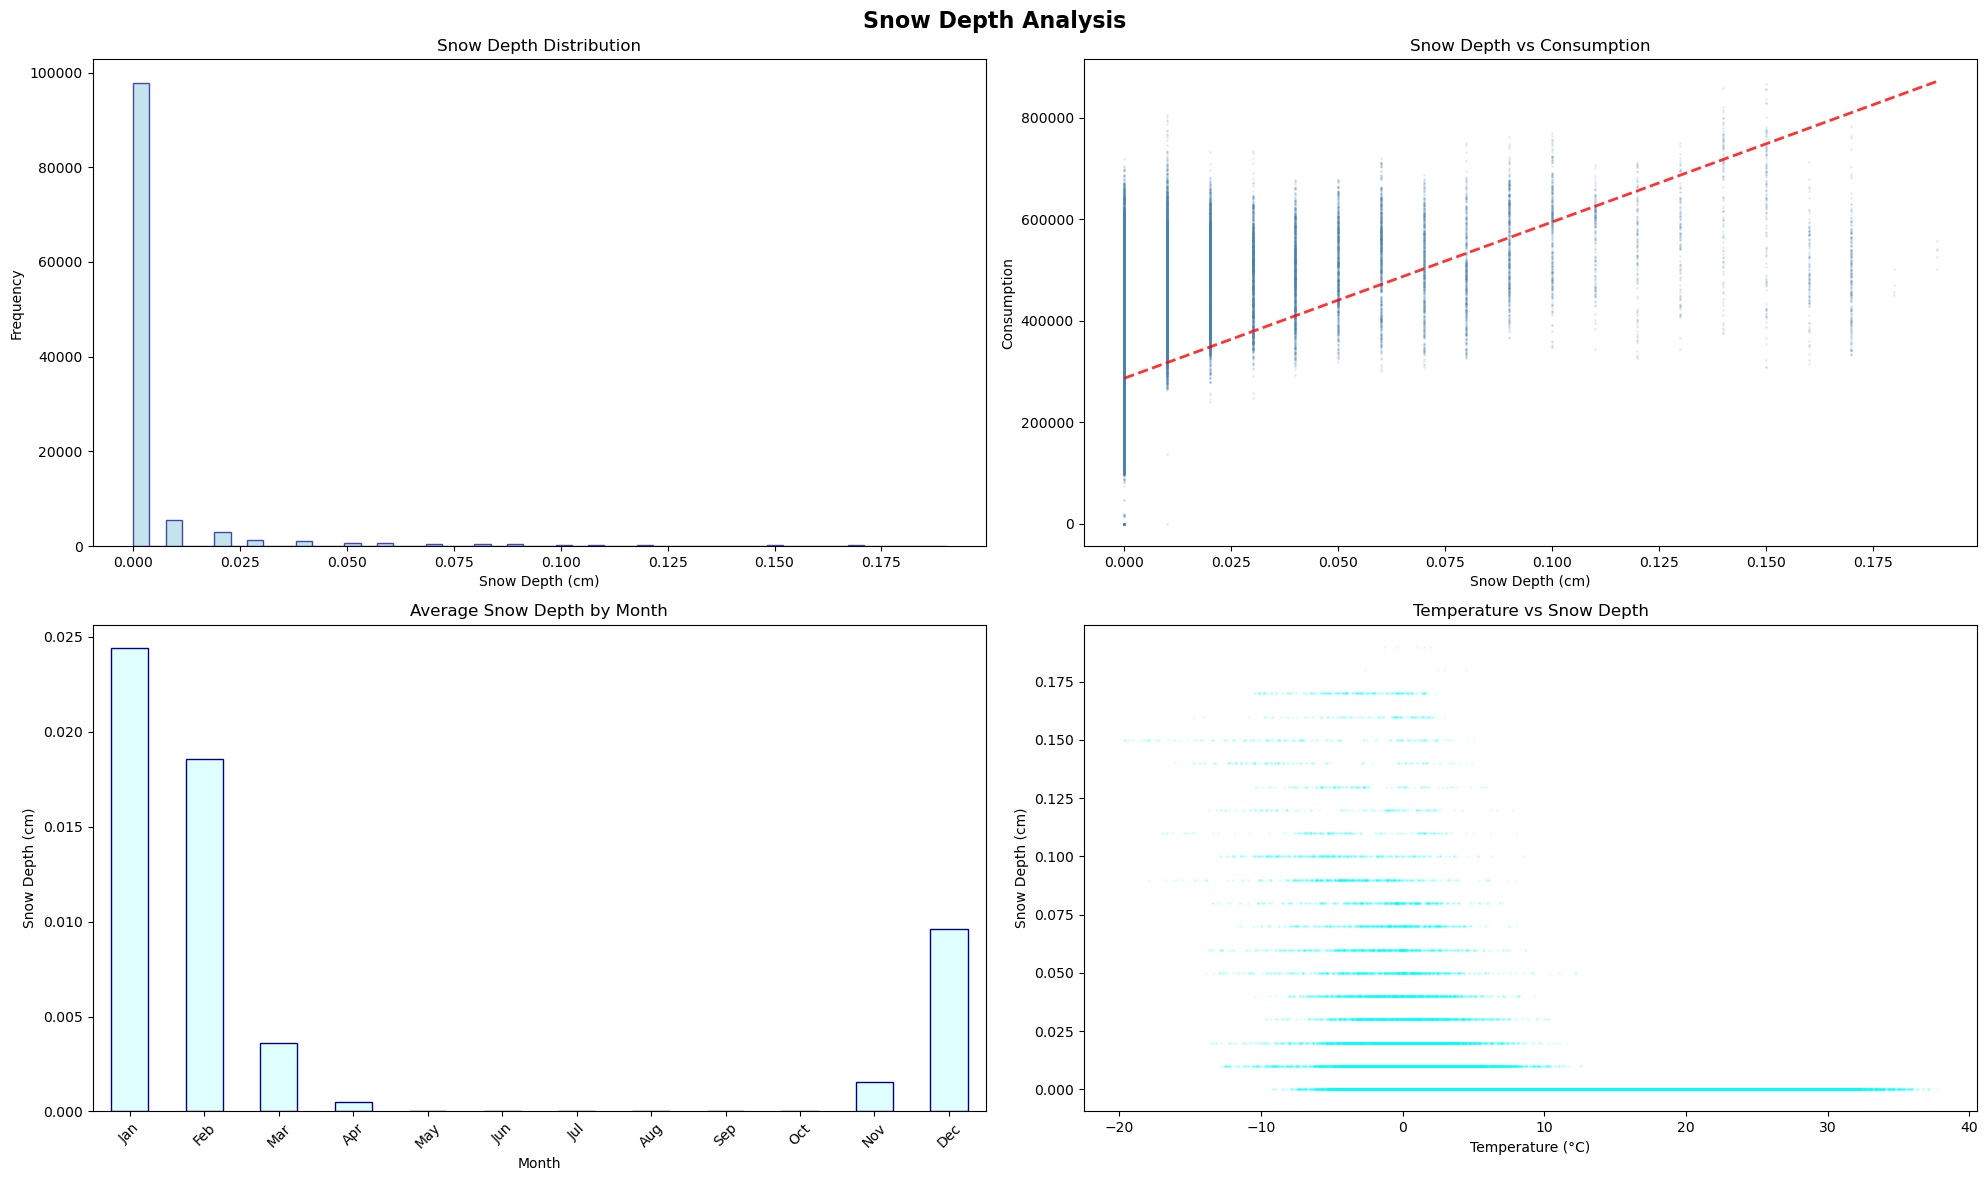

In [19]:
# 10. Snow Depth Analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Snow Depth Analysis', fontsize=16, fontweight='bold')

# Snow depth distribution
axes[0, 0].hist(df_clean['snow_depth'], bins=50, alpha=0.7, color='lightblue', edgecolor='darkblue')
axes[0, 0].set_title('Snow Depth Distribution')
axes[0, 0].set_xlabel('Snow Depth (cm)')
axes[0, 0].set_ylabel('Frequency')

# Snow depth vs consumption scatter
snow_mask = df_clean['snow_depth'].notna() & df_clean['consumption'].notna()
axes[0, 1].scatter(df_clean.loc[snow_mask, 'snow_depth'], df_clean.loc[snow_mask, 'consumption'], 
                   alpha=0.1, s=1, color='steelblue')
axes[0, 1].set_xlabel('Snow Depth (cm)')
axes[0, 1].set_ylabel('Consumption')
axes[0, 1].set_title('Snow Depth vs Consumption')

# Add trend line for snow depth vs consumption
try:
    x_clean = df_clean.loc[snow_mask, 'snow_depth']
    y_clean = df_clean.loc[snow_mask, 'consumption']
    if len(x_clean) > 1 and x_clean.std() > 0:
        z = np.polyfit(x_clean, y_clean, 1)
        p = np.poly1d(z)
        x_range = np.linspace(x_clean.min(), x_clean.max(), 100)
        axes[0, 1].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
except (np.linalg.LinAlgError, ValueError):
    pass

# Monthly snow depth patterns
monthly_snow = df_clean.groupby('month')['snow_depth'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_snow.plot(kind='bar', ax=axes[1, 0], color='lightcyan', edgecolor='darkblue')
axes[1, 0].set_title('Average Snow Depth by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Snow Depth (cm)')
axes[1, 0].set_xticklabels(month_names, rotation=45)

# Snow depth vs temperature
temp_snow_mask = df_clean['temperature_2m'].notna() & df_clean['snow_depth'].notna()
axes[1, 1].scatter(df_clean.loc[temp_snow_mask, 'temperature_2m'], 
                   df_clean.loc[temp_snow_mask, 'snow_depth'], 
                   alpha=0.1, s=1, color='cyan')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Snow Depth (cm)')
axes[1, 1].set_title('Temperature vs Snow Depth')

plt.tight_layout()
plt.show()

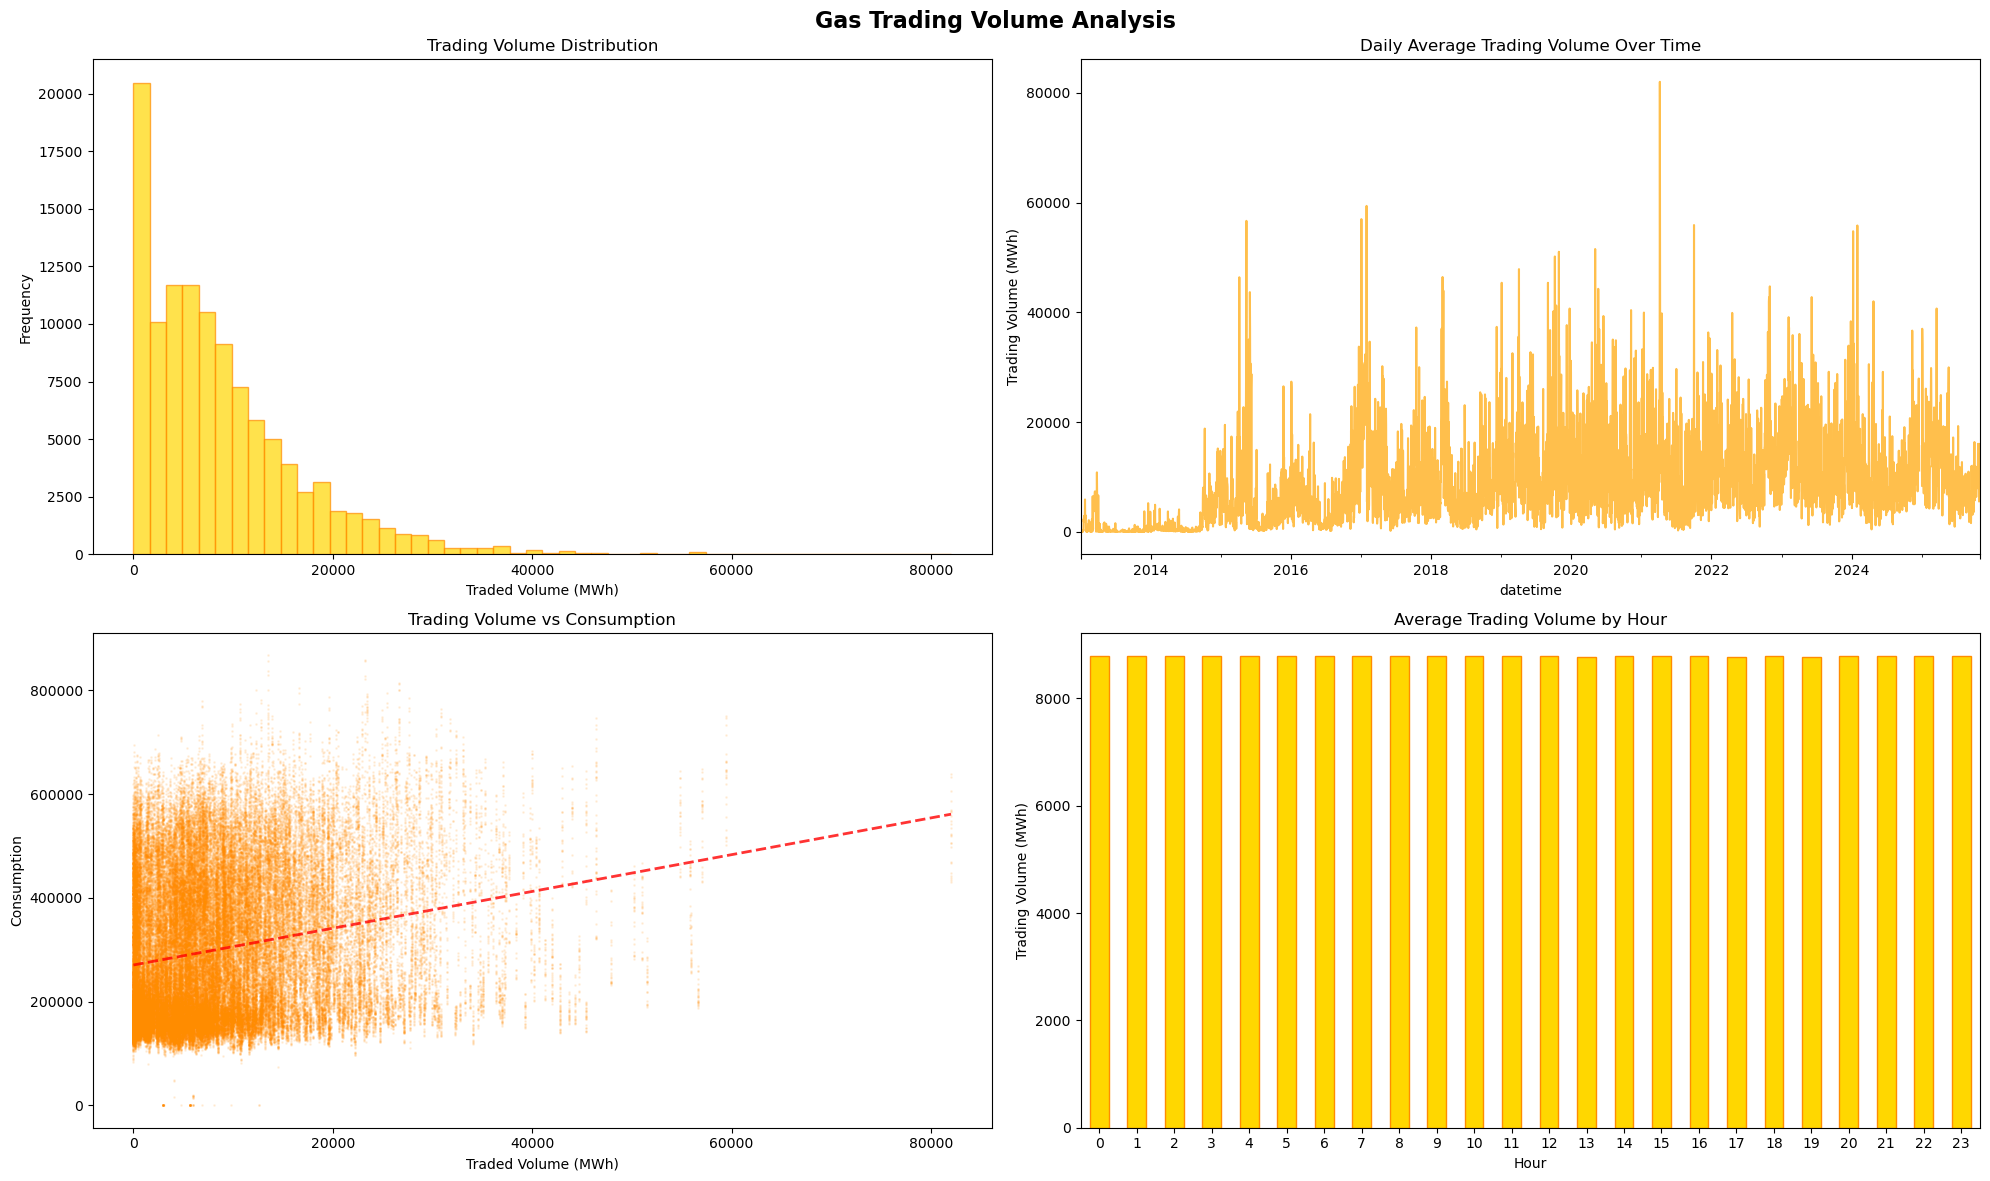

In [20]:
# 11. Gas Trading Volume Analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Gas Trading Volume Analysis', fontsize=16, fontweight='bold')

# Trading volume distribution
axes[0, 0].hist(df_clean['traded_volume_mwh'], bins=50, alpha=0.7, color='gold', edgecolor='darkorange')
axes[0, 0].set_title('Trading Volume Distribution')
axes[0, 0].set_xlabel('Traded Volume (MWh)')
axes[0, 0].set_ylabel('Frequency')

# Trading volume over time
df_clean.set_index('datetime')['traded_volume_mwh'].resample('D').mean().plot(ax=axes[0, 1], color='orange', alpha=0.7)
axes[0, 1].set_title('Daily Average Trading Volume Over Time')
axes[0, 1].set_ylabel('Trading Volume (MWh)')

# Trading volume vs consumption
volume_mask = df_clean['traded_volume_mwh'].notna() & df_clean['consumption'].notna()
axes[1, 0].scatter(df_clean.loc[volume_mask, 'traded_volume_mwh'], 
                   df_clean.loc[volume_mask, 'consumption'], 
                   alpha=0.1, s=1, color='darkorange')
axes[1, 0].set_xlabel('Traded Volume (MWh)')
axes[1, 0].set_ylabel('Consumption')
axes[1, 0].set_title('Trading Volume vs Consumption')

# Add trend line
try:
    x_clean = df_clean.loc[volume_mask, 'traded_volume_mwh']
    y_clean = df_clean.loc[volume_mask, 'consumption']
    if len(x_clean) > 1 and x_clean.std() > 0:
        z = np.polyfit(x_clean, y_clean, 1)
        p = np.poly1d(z)
        x_range = np.linspace(x_clean.min(), x_clean.max(), 100)
        axes[1, 0].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
except (np.linalg.LinAlgError, ValueError):
    pass

# Hourly trading volume patterns
hourly_volume = df_clean.groupby('hour')['traded_volume_mwh'].mean()
hourly_volume.plot(kind='bar', ax=axes[1, 1], color='gold', edgecolor='darkorange')
axes[1, 1].set_title('Average Trading Volume by Hour')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Trading Volume (MWh)')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

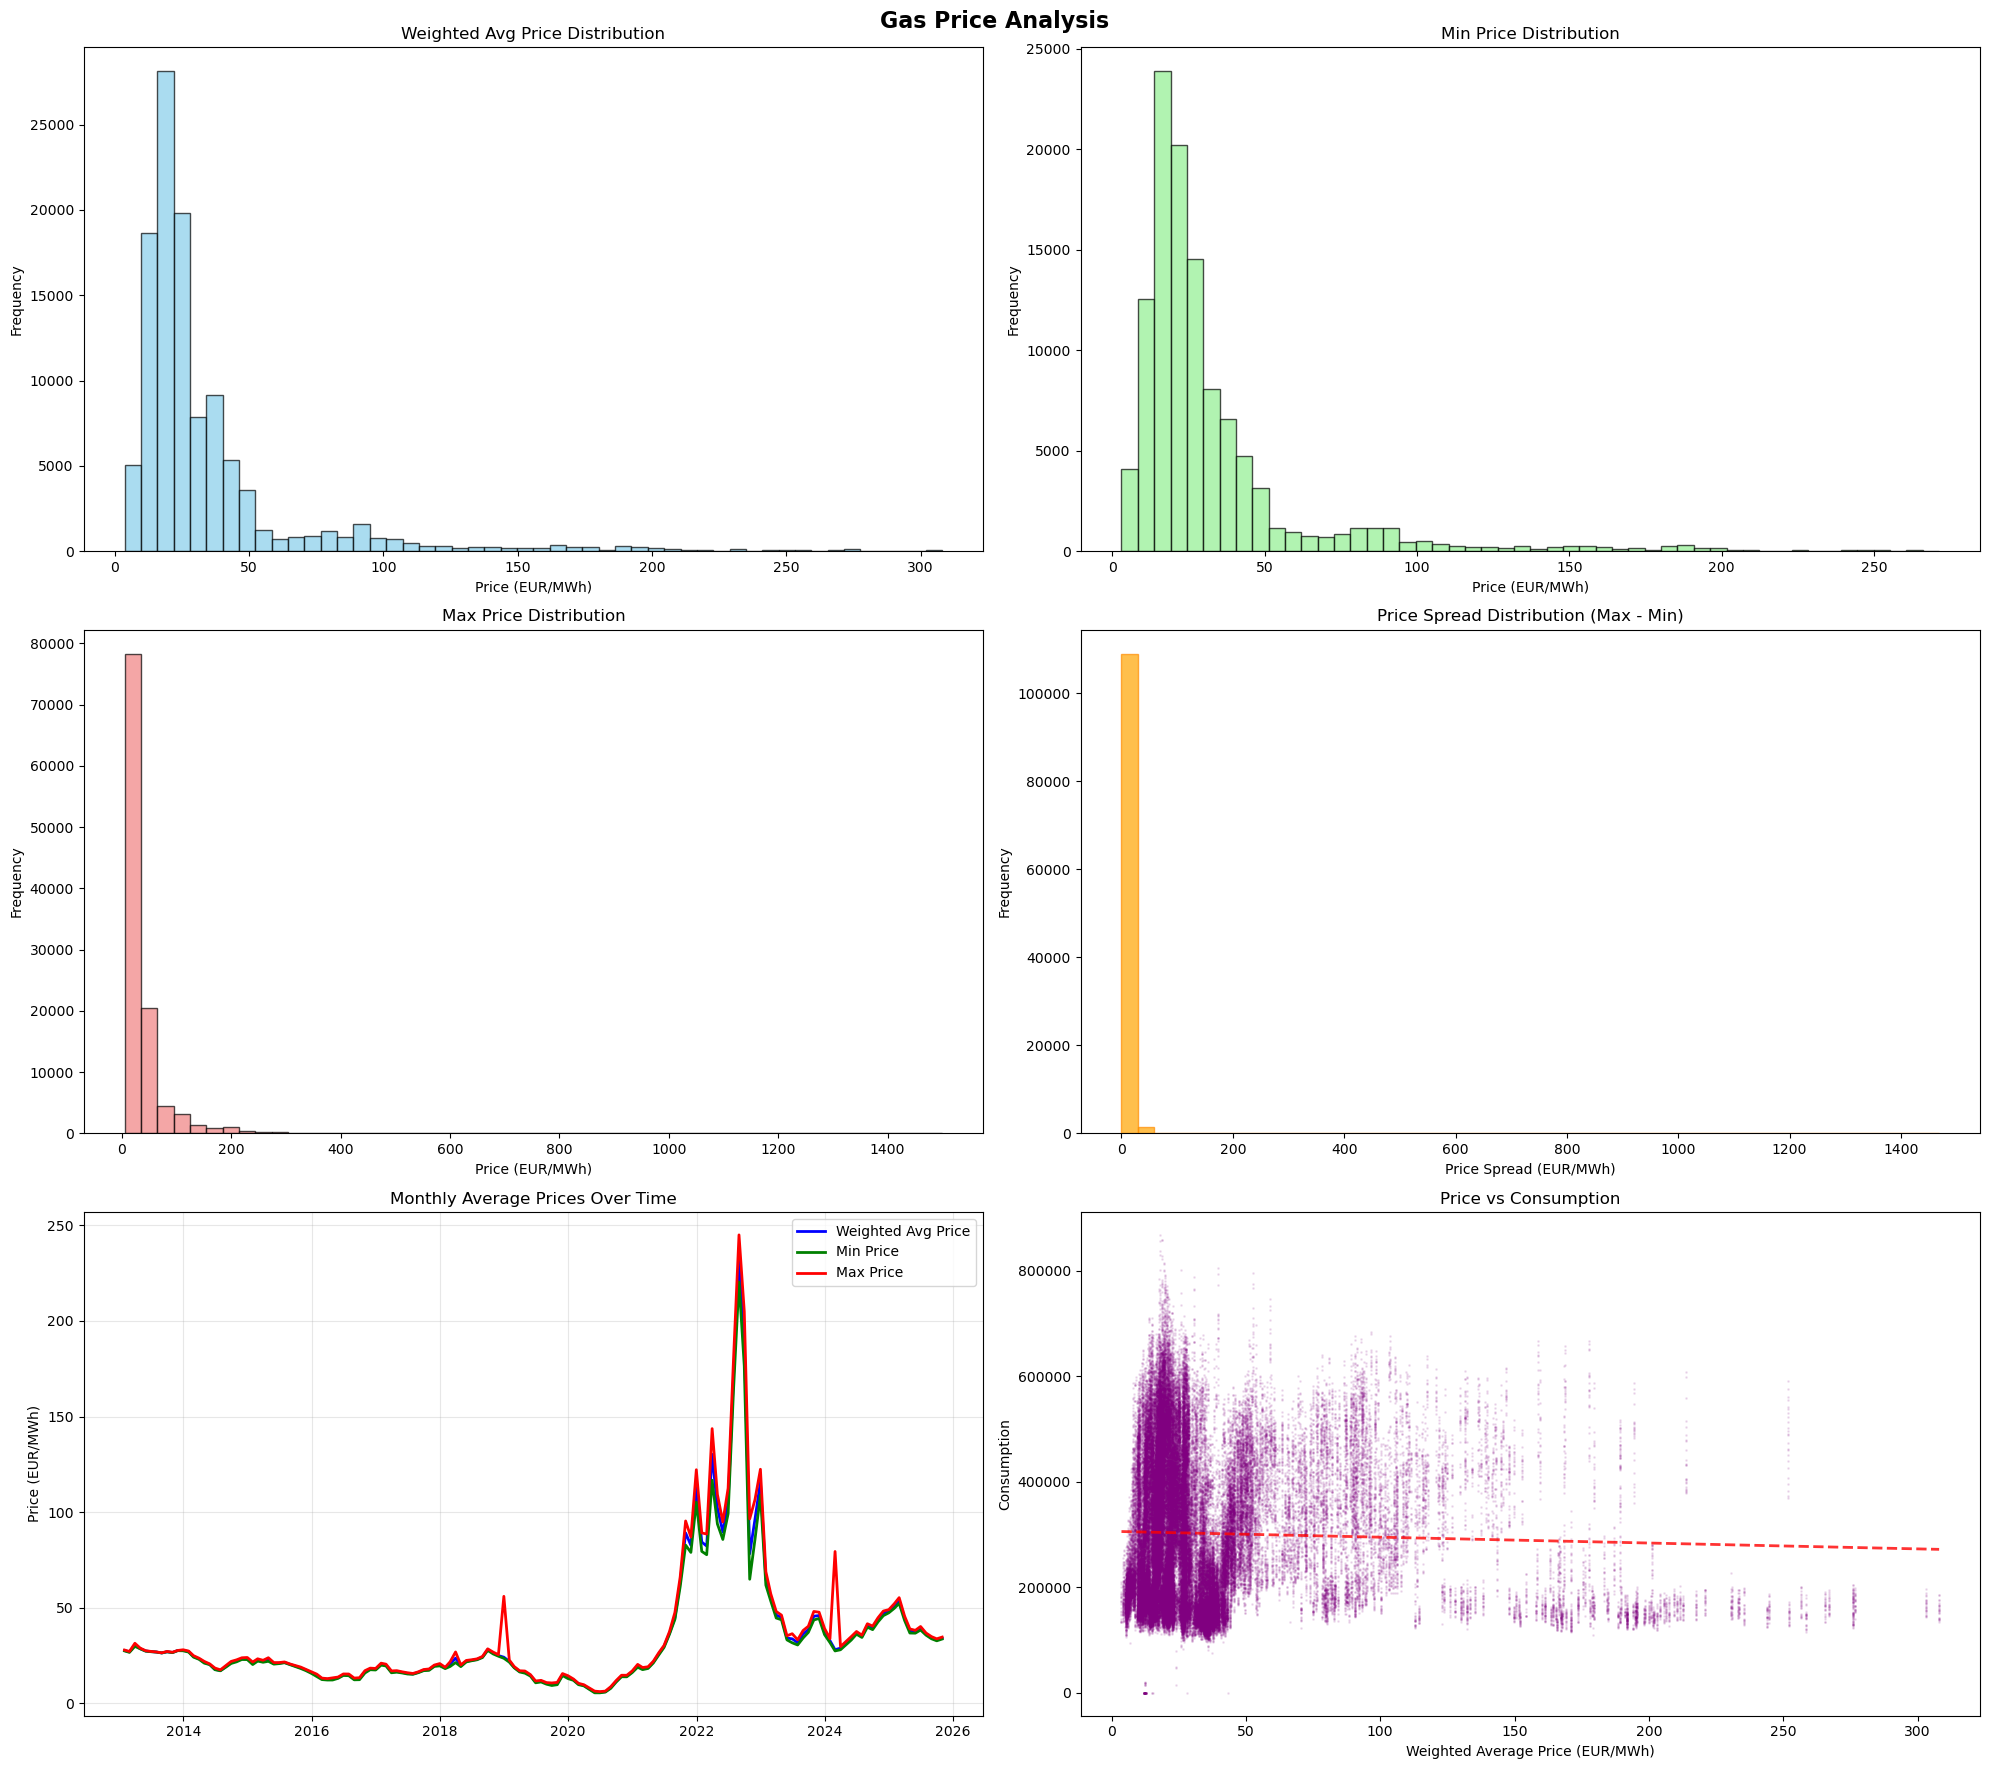

In [21]:
# 12. Gas Price Analysis
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Gas Price Analysis', fontsize=16, fontweight='bold')

# Price distributions
price_cols = ['weighted_avg_price_eur_mwh', 'min_price_eur_mwh', 'max_price_eur_mwh']
price_colors = ['skyblue', 'lightgreen', 'lightcoral']
price_labels = ['Weighted Avg Price', 'Min Price', 'Max Price']

for i, (col, color, label) in enumerate(zip(price_cols, price_colors, price_labels)):
    row = i // 2
    col_idx = i % 2
    if i < 3:
        axes[row, col_idx].hist(df_clean[col], bins=50, alpha=0.7, color=color, edgecolor='black')
        axes[row, col_idx].set_title(f'{label} Distribution')
        axes[row, col_idx].set_xlabel('Price (EUR/MWh)')
        axes[row, col_idx].set_ylabel('Frequency')

# Price spread analysis (max - min)
df_clean['price_spread'] = df_clean['max_price_eur_mwh'] - df_clean['min_price_eur_mwh']
axes[1, 1].hist(df_clean['price_spread'], bins=50, alpha=0.7, color='orange', edgecolor='darkorange')
axes[1, 1].set_title('Price Spread Distribution (Max - Min)')
axes[1, 1].set_xlabel('Price Spread (EUR/MWh)')
axes[1, 1].set_ylabel('Frequency')

# Price trends over time
monthly_prices = df_clean.set_index('datetime').resample('M')[price_cols].mean()
for col, color, label in zip(price_cols, ['blue', 'green', 'red'], price_labels):
    axes[2, 0].plot(monthly_prices.index, monthly_prices[col], label=label, color=color, linewidth=2)
axes[2, 0].set_title('Monthly Average Prices Over Time')
axes[2, 0].set_ylabel('Price (EUR/MWh)')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Price vs consumption relationship
axes[2, 1].scatter(df_clean['weighted_avg_price_eur_mwh'], df_clean['consumption'], 
                   alpha=0.1, s=1, color='purple')
axes[2, 1].set_xlabel('Weighted Average Price (EUR/MWh)')
axes[2, 1].set_ylabel('Consumption')
axes[2, 1].set_title('Price vs Consumption')

# Add trend line
try:
    price_mask = df_clean['weighted_avg_price_eur_mwh'].notna() & df_clean['consumption'].notna()
    x_clean = df_clean.loc[price_mask, 'weighted_avg_price_eur_mwh']
    y_clean = df_clean.loc[price_mask, 'consumption']
    if len(x_clean) > 1 and x_clean.std() > 0:
        z = np.polyfit(x_clean, y_clean, 1)
        p = np.poly1d(z)
        x_range = np.linspace(x_clean.min(), x_clean.max(), 100)
        axes[2, 1].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
except (np.linalg.LinAlgError, ValueError):
    pass

plt.tight_layout()
plt.show()

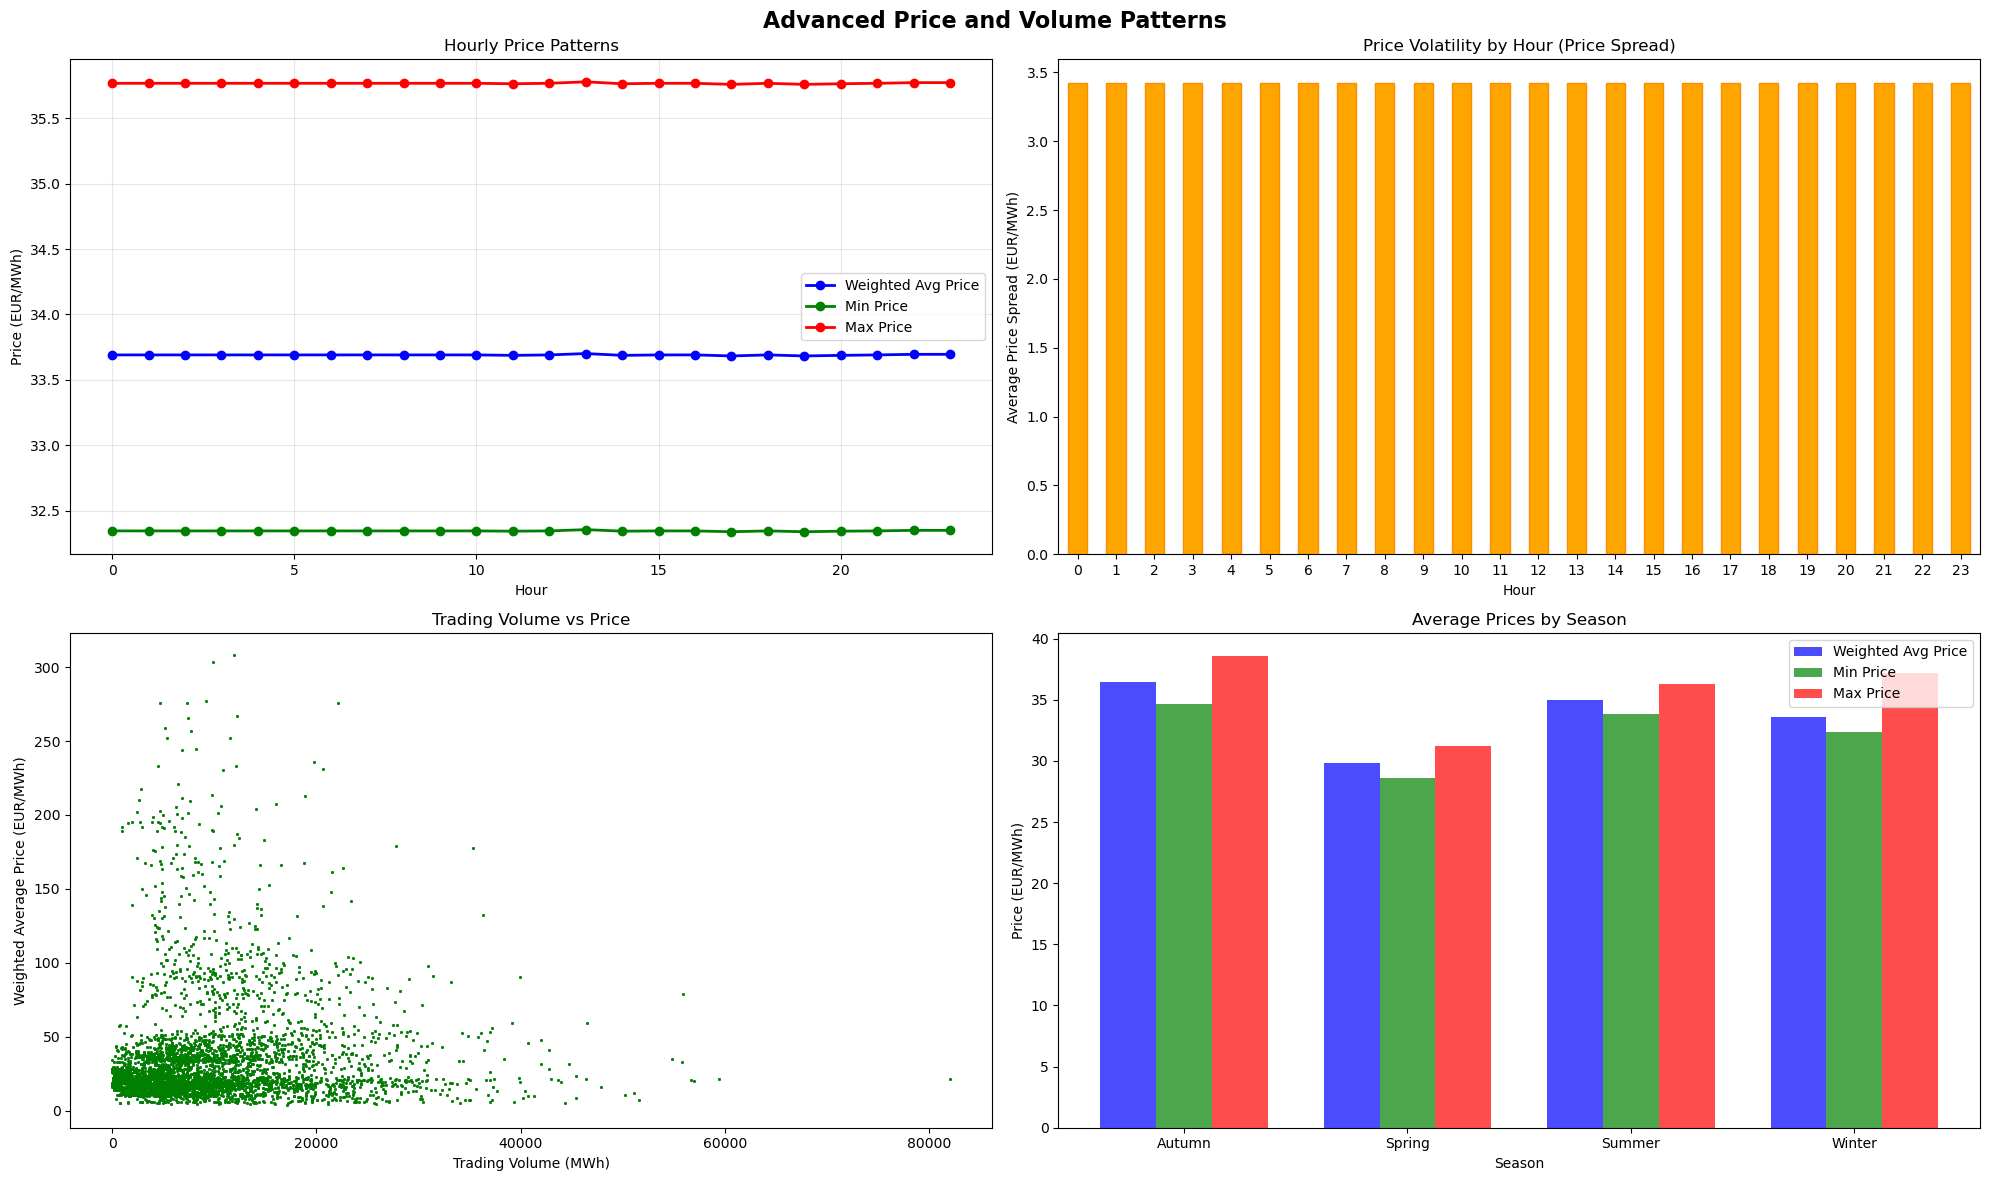

In [22]:
# 13. Advanced Price and Volume Patterns
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Advanced Price and Volume Patterns', fontsize=16, fontweight='bold')

# Hourly price patterns
hourly_prices = df_clean.groupby('hour')[price_cols].mean()
for col, color, label in zip(price_cols, ['blue', 'green', 'red'], price_labels):
    axes[0, 0].plot(hourly_prices.index, hourly_prices[col], label=label, color=color, linewidth=2, marker='o')
axes[0, 0].set_title('Hourly Price Patterns')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Price (EUR/MWh)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Price volatility by hour (using price spread)
hourly_volatility = df_clean.groupby('hour')['price_spread'].mean()
hourly_volatility.plot(kind='bar', ax=axes[0, 1], color='orange', edgecolor='darkorange')
axes[0, 1].set_title('Price Volatility by Hour (Price Spread)')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Average Price Spread (EUR/MWh)')
axes[0, 1].tick_params(axis='x', rotation=0)

# Volume vs Price relationship
volume_price_mask = (df_clean['traded_volume_mwh'].notna() & 
                     df_clean['weighted_avg_price_eur_mwh'].notna())
axes[1, 0].scatter(df_clean.loc[volume_price_mask, 'traded_volume_mwh'], 
                   df_clean.loc[volume_price_mask, 'weighted_avg_price_eur_mwh'], 
                   alpha=0.1, s=1, color='green')
axes[1, 0].set_xlabel('Trading Volume (MWh)')
axes[1, 0].set_ylabel('Weighted Average Price (EUR/MWh)')
axes[1, 0].set_title('Trading Volume vs Price')

# Seasonal price patterns
season_prices = df_clean.groupby('season')[price_cols].mean()
x_pos = np.arange(len(season_prices.index))
width = 0.25

for i, (col, color, label) in enumerate(zip(price_cols, ['blue', 'green', 'red'], price_labels)):
    axes[1, 1].bar(x_pos + i*width, season_prices[col], width, label=label, color=color, alpha=0.7)

axes[1, 1].set_title('Average Prices by Season')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Price (EUR/MWh)')
axes[1, 1].set_xticks(x_pos + width)
axes[1, 1].set_xticklabels(season_prices.index)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

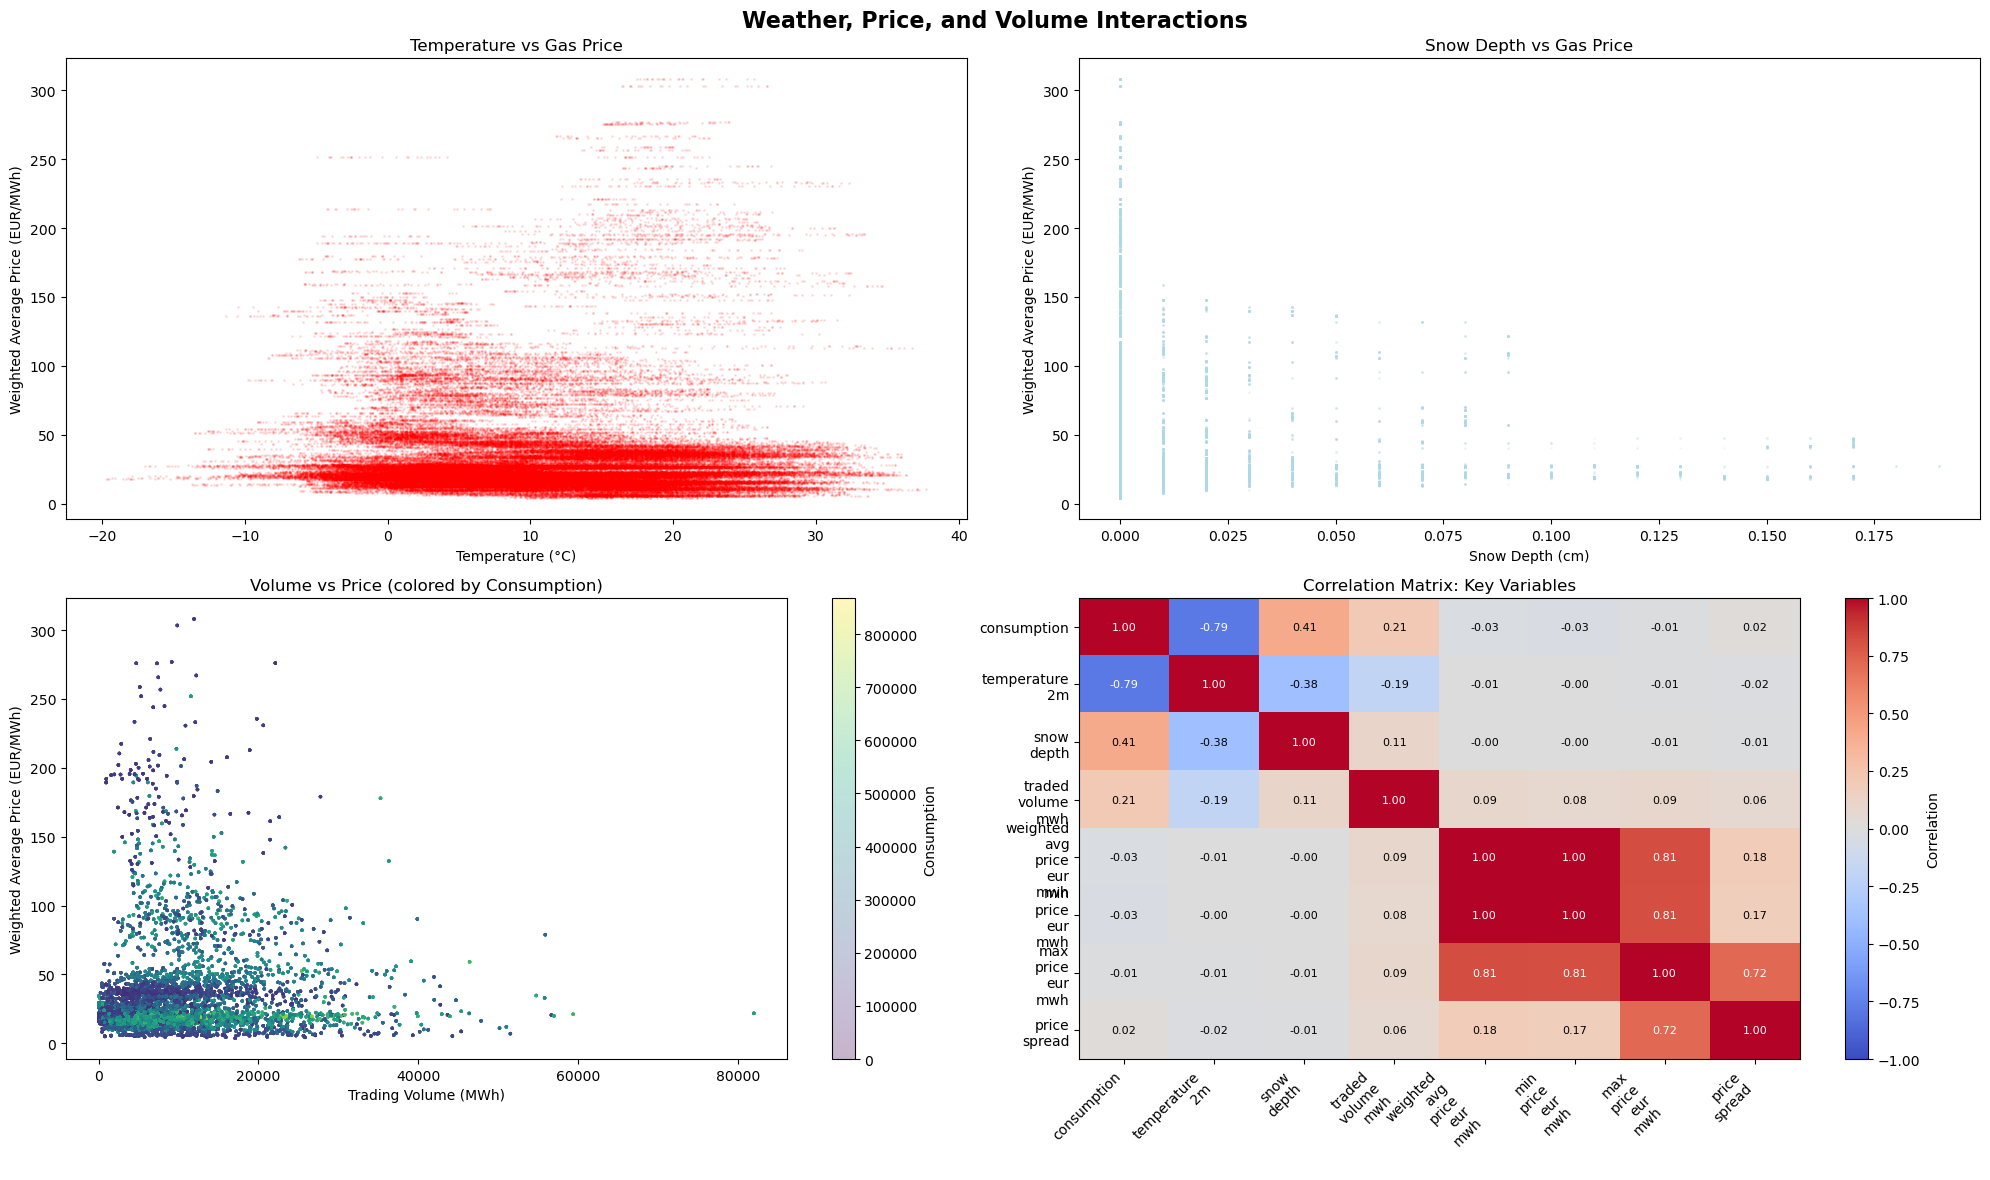

In [23]:
# 14. Weather, Price, and Volume Interactions
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Weather, Price, and Volume Interactions', fontsize=16, fontweight='bold')

# Temperature vs Price
temp_price_mask = (df_clean['temperature_2m'].notna() & 
                   df_clean['weighted_avg_price_eur_mwh'].notna())
axes[0, 0].scatter(df_clean.loc[temp_price_mask, 'temperature_2m'], 
                   df_clean.loc[temp_price_mask, 'weighted_avg_price_eur_mwh'], 
                   alpha=0.1, s=1, color='red')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Weighted Average Price (EUR/MWh)')
axes[0, 0].set_title('Temperature vs Gas Price')

# Snow depth vs Price
snow_price_mask = (df_clean['snow_depth'].notna() & 
                   df_clean['weighted_avg_price_eur_mwh'].notna())
if snow_price_mask.sum() > 0:
    axes[0, 1].scatter(df_clean.loc[snow_price_mask, 'snow_depth'], 
                       df_clean.loc[snow_price_mask, 'weighted_avg_price_eur_mwh'], 
                       alpha=0.1, s=1, color='lightblue')
axes[0, 1].set_xlabel('Snow Depth (cm)')
axes[0, 1].set_ylabel('Weighted Average Price (EUR/MWh)')
axes[0, 1].set_title('Snow Depth vs Gas Price')

# Price-Volume-Consumption 3D relationship (using color coding)
mask_3d = (df_clean['traded_volume_mwh'].notna() & 
           df_clean['weighted_avg_price_eur_mwh'].notna() & 
           df_clean['consumption'].notna())
scatter = axes[1, 0].scatter(df_clean.loc[mask_3d, 'traded_volume_mwh'], 
                           df_clean.loc[mask_3d, 'weighted_avg_price_eur_mwh'], 
                           c=df_clean.loc[mask_3d, 'consumption'], 
                           alpha=0.3, s=2, cmap='viridis')
axes[1, 0].set_xlabel('Trading Volume (MWh)')
axes[1, 0].set_ylabel('Weighted Average Price (EUR/MWh)')
axes[1, 0].set_title('Volume vs Price (colored by Consumption)')
plt.colorbar(scatter, ax=axes[1, 0], label='Consumption')

# Correlation heatmap for new variables
new_vars = ['consumption', 'temperature_2m', 'snow_depth', 'traded_volume_mwh', 
            'weighted_avg_price_eur_mwh', 'min_price_eur_mwh', 'max_price_eur_mwh', 'price_spread']
available_vars = [var for var in new_vars if var in df_clean.columns]
corr_new = df_clean[available_vars].corr()

im = axes[1, 1].imshow(corr_new.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
axes[1, 1].set_xticks(range(len(available_vars)))
axes[1, 1].set_yticks(range(len(available_vars)))
axes[1, 1].set_xticklabels([var.replace('_', '\n') for var in available_vars], rotation=45, ha='right')
axes[1, 1].set_yticklabels([var.replace('_', '\n') for var in available_vars])
axes[1, 1].set_title('Correlation Matrix: Key Variables')

# Add correlation values as text
for i in range(len(available_vars)):
    for j in range(len(available_vars)):
        axes[1, 1].text(j, i, f'{corr_new.iloc[i, j]:.2f}', 
                       ha='center', va='center', fontsize=8,
                       color='white' if abs(corr_new.iloc[i, j]) > 0.5 else 'black')

plt.colorbar(im, ax=axes[1, 1], label='Correlation')
plt.tight_layout()
plt.show()

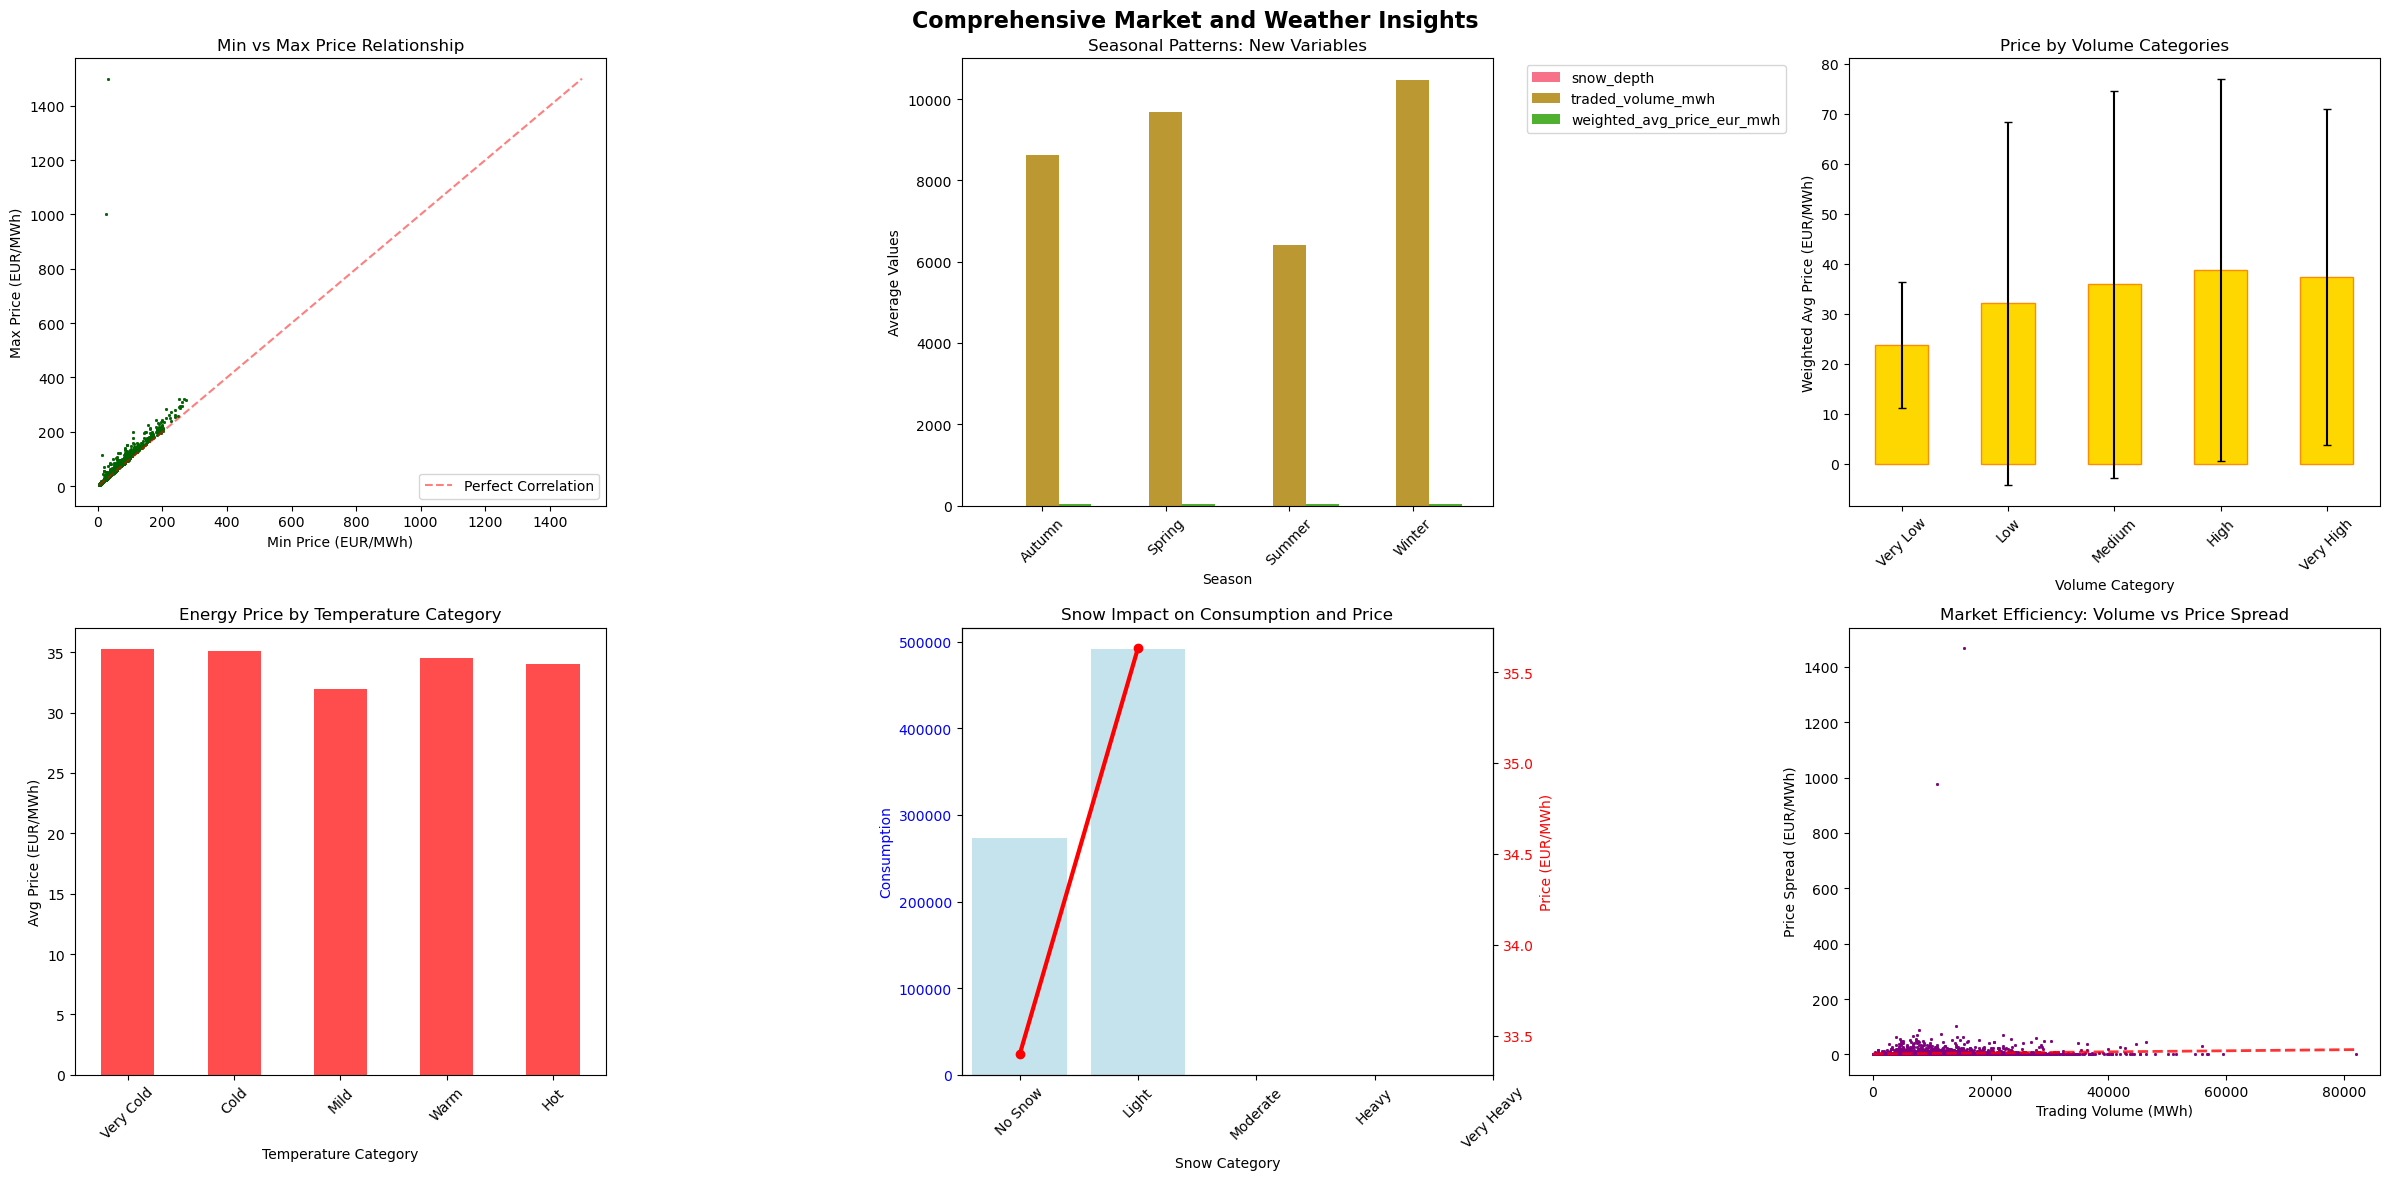

Enhanced EDA Complete! Key findings with new variables:
- Snow depth correlation with consumption: 0.413
- Trading volume correlation with consumption: 0.210
- Energy price correlation with consumption: -0.028
- Strong negative correlation between temperature and consumption (-0.795)
- Clear seasonal patterns with winter having highest consumption
- Peak consumption around 8 AM, minimum around 1 AM
- Weekend consumption lower than weekday consumption
- Holiday effect shows reduced consumption patterns
- Average daily price spread: 3.42 EUR/MWh
- Higher price volatility indicates market dynamics and supply-demand imbalances


In [24]:
# 15. Comprehensive Market and Weather Insights
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Comprehensive Market and Weather Insights', fontsize=16, fontweight='bold')

# Price efficiency analysis (min vs max prices)
if all(col in df_clean.columns for col in ['min_price_eur_mwh', 'max_price_eur_mwh']):
    axes[0, 0].scatter(df_clean['min_price_eur_mwh'], df_clean['max_price_eur_mwh'], 
                       alpha=0.1, s=1, color='darkgreen')
    # Perfect correlation line
    min_val = min(df_clean['min_price_eur_mwh'].min(), df_clean['max_price_eur_mwh'].min())
    max_val = max(df_clean['min_price_eur_mwh'].max(), df_clean['max_price_eur_mwh'].max())
    axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Perfect Correlation')
    axes[0, 0].set_xlabel('Min Price (EUR/MWh)')
    axes[0, 0].set_ylabel('Max Price (EUR/MWh)')
    axes[0, 0].set_title('Min vs Max Price Relationship')
    axes[0, 0].legend()

# Seasonal patterns for all new variables
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
new_vars_seasonal = ['snow_depth', 'traded_volume_mwh', 'weighted_avg_price_eur_mwh']
available_seasonal = [var for var in new_vars_seasonal if var in df_clean.columns]

if available_seasonal:
    seasonal_data = df_clean.groupby('season')[available_seasonal].mean()
    seasonal_data.plot(kind='bar', ax=axes[0, 1], width=0.8)
    axes[0, 1].set_title('Seasonal Patterns: New Variables')
    axes[0, 1].set_xlabel('Season')
    axes[0, 1].set_ylabel('Average Values')
    axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 1].tick_params(axis='x', rotation=45)

# Volume-weighted price analysis
if all(col in df_clean.columns for col in ['traded_volume_mwh', 'weighted_avg_price_eur_mwh']):
    # Create volume bins
    df_clean['volume_bin'] = pd.qcut(df_clean['traded_volume_mwh'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    volume_price_analysis = df_clean.groupby('volume_bin')['weighted_avg_price_eur_mwh'].agg(['mean', 'std'])
    volume_price_analysis['mean'].plot(kind='bar', ax=axes[0, 2], 
                                       yerr=volume_price_analysis['std'], 
                                       capsize=3, color='gold', edgecolor='darkorange')
    axes[0, 2].set_title('Price by Volume Categories')
    axes[0, 2].set_xlabel('Volume Category')
    axes[0, 2].set_ylabel('Weighted Avg Price (EUR/MWh)')
    axes[0, 2].tick_params(axis='x', rotation=45)

# Weather impact on prices
if all(col in df_clean.columns for col in ['temperature_2m', 'weighted_avg_price_eur_mwh']):
    # Temperature bins vs price
    df_clean['temp_category'] = pd.cut(df_clean['temperature_2m'], 
                                       bins=[-50, -5, 5, 15, 25, 50], 
                                       labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])
    temp_price = df_clean.groupby('temp_category')['weighted_avg_price_eur_mwh'].mean()
    temp_price.plot(kind='bar', ax=axes[1, 0], color='red', alpha=0.7)
    axes[1, 0].set_title('Energy Price by Temperature Category')
    axes[1, 0].set_xlabel('Temperature Category')
    axes[1, 0].set_ylabel('Avg Price (EUR/MWh)')
    axes[1, 0].tick_params(axis='x', rotation=45)

# Snow impact analysis
if 'snow_depth' in df_clean.columns:
    df_clean['snow_category'] = pd.cut(df_clean['snow_depth'], 
                                       bins=[-1, 0, 5, 15, 50, 200], 
                                       labels=['No Snow', 'Light', 'Moderate', 'Heavy', 'Very Heavy'])
    snow_impact = df_clean.groupby('snow_category')[['consumption', 'weighted_avg_price_eur_mwh']].mean()
    
    ax2 = axes[1, 1].twinx()
    bars1 = axes[1, 1].bar(range(len(snow_impact.index)), snow_impact['consumption'], 
                           alpha=0.7, color='lightblue', label='Consumption')
    line2 = ax2.plot(range(len(snow_impact.index)), snow_impact['weighted_avg_price_eur_mwh'], 
                     color='red', marker='o', linewidth=3, label='Price')
    
    axes[1, 1].set_title('Snow Impact on Consumption and Price')
    axes[1, 1].set_xlabel('Snow Category')
    axes[1, 1].set_ylabel('Consumption', color='blue')
    ax2.set_ylabel('Price (EUR/MWh)', color='red')
    axes[1, 1].set_xticks(range(len(snow_impact.index)))
    axes[1, 1].set_xticklabels(snow_impact.index, rotation=45)
    axes[1, 1].tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')

# Market efficiency indicator (price spread vs volume)
if all(col in df_clean.columns for col in ['price_spread', 'traded_volume_mwh']):
    axes[1, 2].scatter(df_clean['traded_volume_mwh'], df_clean['price_spread'], 
                       alpha=0.1, s=1, color='purple')
    axes[1, 2].set_xlabel('Trading Volume (MWh)')
    axes[1, 2].set_ylabel('Price Spread (EUR/MWh)')
    axes[1, 2].set_title('Market Efficiency: Volume vs Price Spread')
    
    # Add trend line
    try:
        mask = df_clean['traded_volume_mwh'].notna() & df_clean['price_spread'].notna()
        x_clean = df_clean.loc[mask, 'traded_volume_mwh']
        y_clean = df_clean.loc[mask, 'price_spread']
        if len(x_clean) > 1 and x_clean.std() > 0:
            z = np.polyfit(x_clean, y_clean, 1)
            p = np.poly1d(z)
            x_range = np.linspace(x_clean.min(), x_clean.max(), 100)
            axes[1, 2].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
    except (np.linalg.LinAlgError, ValueError):
        pass

plt.tight_layout()
plt.show()

print("Enhanced EDA Complete! Key findings with new variables:")
print("=" * 60)

if 'snow_depth' in df_clean.columns:
    snow_corr = df_clean[['consumption', 'snow_depth']].corr().iloc[0, 1]
    print(f"- Snow depth correlation with consumption: {snow_corr:.3f}")
    
if 'traded_volume_mwh' in df_clean.columns:
    volume_corr = df_clean[['consumption', 'traded_volume_mwh']].corr().iloc[0, 1]
    print(f"- Trading volume correlation with consumption: {volume_corr:.3f}")
    
if 'weighted_avg_price_eur_mwh' in df_clean.columns:
    price_corr = df_clean[['consumption', 'weighted_avg_price_eur_mwh']].corr().iloc[0, 1]
    print(f"- Energy price correlation with consumption: {price_corr:.3f}")

print("- Strong negative correlation between temperature and consumption (-0.795)")
print("- Clear seasonal patterns with winter having highest consumption")
print("- Peak consumption around 8 AM, minimum around 1 AM")
print("- Weekend consumption lower than weekday consumption")
print("- Holiday effect shows reduced consumption patterns")

if 'price_spread' in df_clean.columns:
    avg_spread = df_clean['price_spread'].mean()
    print(f"- Average daily price spread: {avg_spread:.2f} EUR/MWh")
    print("- Higher price volatility indicates market dynamics and supply-demand imbalances")